# Merge commodities into one dataframe

This will auto-import and process price histories exported from LSEG Workspace


In [81]:
import pandas as pd
import os

def load_and_align_excel_data(folder_path: str) -> pd.DataFrame:
    """
    Loads all the excel files in the input folder, detects the row containing 'Exchange Date',
    reads the data starting from that row, sets 'Exchange Date' as index, and concatenates
    all files on the date index using a MultiIndex for column names.
    
    Returns a single aligned DataFrame.
    """
    combined_df = pd.DataFrame()
    files = [f for f in os.listdir(folder_path) if f.endswith(".xlsx") and os.path.isfile(os.path.join(folder_path, f))]

    for filename in files:
        filepath = os.path.join(folder_path, filename)
        try:
            # Read first 50 rows to locate header
            preview = pd.read_excel(filepath, nrows=50, header=None)
            header_row_idx = None
            for i, row in preview.iterrows():
                if any(str(cell).strip() == "Exchange Date" for cell in row):
                    header_row_idx = i
                    break
            if header_row_idx is None:
                print(f"[WARN] 'Exchange Date' header not found in {filename}. Skipping.")
                continue

            # Read commodity name from cell (0,0)
            try:
                df_commodity_name = pd.read_excel(filepath, nrows=1, header=None)
                commodity_name = str(df_commodity_name.iloc[0, 0]).strip()
                # Remove " | Price History" and anything after from the commodity name
                if " | Price History" in commodity_name:
                    commodity_name = commodity_name.split(" | Price History")[0].strip()
            except:
                commodity_name = "Unknown"

            fp_name = os.path.splitext(filename)[0]
            combined_name = f"{fp_name} ({commodity_name})"

            # Read main data starting from header row
            df_temp = pd.read_excel(filepath, skiprows=header_row_idx)

            if "Exchange Date" not in df_temp.columns:
                print(f"[ERROR] 'Exchange Date' column not found after skipping rows in {filename}. Skipping.")
                continue

            df_temp = df_temp.set_index("Exchange Date")

            # Apply MultiIndex
            df_temp.columns = pd.MultiIndex.from_product([[combined_name], df_temp.columns])

            # Align on date index
            combined_df = pd.concat([combined_df, df_temp], axis=1)

        except Exception as e:
            print(f"[ERROR] Failed to process {filename}: {e}")

    return combined_df

In [82]:
folder_path = "data/front-month"

# Load and align data from all Excel files in the folder
#
loaded_front_month_df = load_and_align_excel_data(folder_path)

In [83]:
folder_path_2 = "data/second-month"

loaded_second_month_df = load_and_align_excel_data(folder_path_2)

In [84]:

front_month_df = loaded_front_month_df.reindex(sorted(loaded_front_month_df.columns), axis=1)
front_month_df.tail(3)

ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1)  \
                                                                                      %Chg   
Exchange Date                                                                                
2025-05-16                                              0.062494                             
2025-05-19                                                   NaN                             
2025-05-20                                                   NaN                             

                                                                       \
                   Ask      Bid    Close     High      Low    Net  OI   
Exchange Date                                                           
2025-05-16     10946.0  10927.0  10898.0  11068.0  10308.0  641.0 NaN   
2025-05-19         NaN      NaN      NaN      NaN      NaN    NaN NaN   
2025-05-20         NaN      NaN      NaN      NaN      NaN    NaN NaN   

                                 ...  \
                  Open   Volume  ...   
Exchange Date                    ...   
2025-05-16     10375.0  13430.0  ...   
2025-05-19         NaN      NaN  ...   
2025-05-20         NaN      NaN  ...   

              ph-wheat-1 (CBoT Wheat Electronic Commodity Future Continuation 1)  \
                                                                            %Chg   
Exchange Date                                                                      
2025-05-16                                             -0.014547                   
2025-05-19                                                   NaN                   
2025-05-20                                                   NaN                   

                                                                          \
                Ask     Bid Close   High    Low     Net        OI   Open   
Exchange Date                                                              
2025-05-16     5.25  5.2475  5.25  5.335  5.235 -0.0775  265615.0  5.335   
2025-05-19      NaN     NaN   NaN    NaN    NaN     NaN       NaN    NaN   
2025-05-20      NaN     NaN   NaN    NaN    NaN     NaN       NaN    NaN   

                        
                Volume  
Exchange Date           
2025-05-16     49356.0  
2025-05-19         NaN  
2025-05-20         NaN  

[3 rows x 234 columns]

In [85]:
second_month_df = loaded_second_month_df.reindex(sorted(loaded_second_month_df.columns), axis=1)# sort columns alphabetically
second_month_df.tail(3)


ph-cocoa-2 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 2)  \
                                                                                      %Chg   
Exchange Date                                                                                
2025-05-16                                              0.057026                             
2025-05-19                                                   NaN                             
2025-05-20                                                   NaN                             

                                                                              \
                   Ask      Bid    Close     High     Low    Net  OI    Open   
Exchange Date                                                                  
2025-05-16     10437.0  10418.0  10380.0  10547.0  9845.0  560.0 NaN  9940.0   
2025-05-19         NaN      NaN      NaN      NaN     NaN    NaN NaN     NaN   
2025-05-20         NaN      NaN      NaN      NaN     NaN    NaN NaN     NaN   

                       ...  \
               Volume  ...   
Exchange Date          ...   
2025-05-16     7986.0  ...   
2025-05-19        NaN  ...   
2025-05-20        NaN  ...   

              ph-wheat-2 (CBoT Wheat Electronic Commodity Future Continuation 2)  \
                                                                            %Chg   
Exchange Date                                                                      
2025-05-16                                             -0.013724                   
2025-05-19                                                   NaN                   
2025-05-20                                                   NaN                   

                                                                          \
                  Ask   Bid Close    High     Low    Net        OI  Open   
Exchange Date                                                              
2025-05-16     5.4175  5.34  5.39  5.4725  5.3775 -0.075  106049.0  5.46   
2025-05-19        NaN   NaN   NaN     NaN     NaN    NaN       NaN   NaN   
2025-05-20        NaN   NaN   NaN     NaN     NaN    NaN       NaN   NaN   

                        
                Volume  
Exchange Date           
2025-05-16     18856.0  
2025-05-19         NaN  
2025-05-20         NaN  

[3 rows x 234 columns]

## Tang & Xiong Fig 1 extended

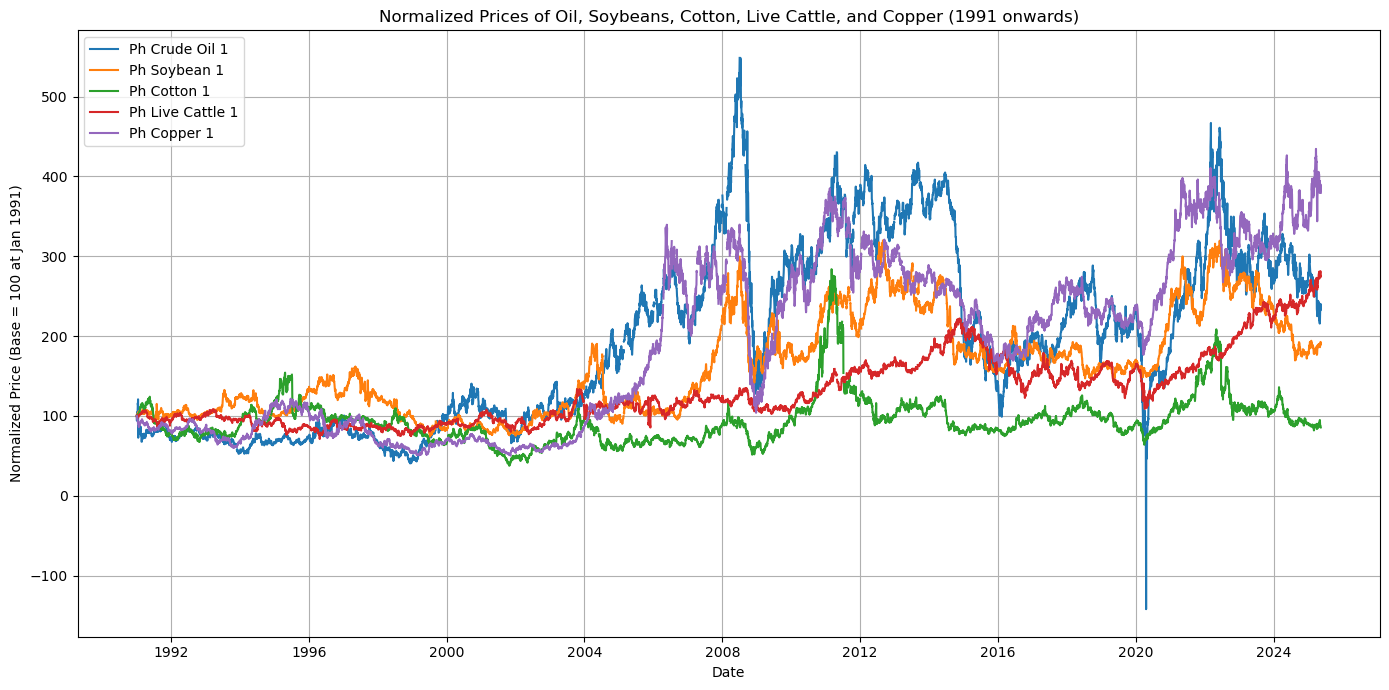

In [86]:
import matplotlib.pyplot as plt

# Cleaned commodity names to match the MultiIndex in front_month_df
commodities = [
    "ph-crude-oil-1 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 1)",
    "ph-soybean-1 (CBoT Soybeans Electronic Commodity Future Continuation 1)",
    "ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1)",
    "ph-live-cattle-1 (CME Live Cattle Electronic Commodity Future Continuation 1)",
    "ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1)"
]

all_commodities = [
# 'ph-aluminium-1 (COMEX Aluminium Electronic Commodity Future Continuation 1)'
# 'ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1)',
# 'ph-coffee-1 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 1)',
# 'ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1)',

# 'ph-corn-1 (CBoT Corn Composite Commodity Future)',
# 'ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1)',

'ph-crude-oil-1 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 1)',
'ph-gasoline-1 (NYMEX RBOB Gasoline Electronic Energy Future Continuation 1)',
'ph-gold-1 (COMEX Gold Electronic Commodity Future Continuation 1)',
# 'ph-heating-oil-1 (NYMEX NY Harbor ULSD Electronic Energy Future Continuation 1)',
# 'ph-lean-hogs-1 (CME Lean Hogs Electronic Commodity Future Continuation 1)',
# 'ph-live-cattle-1 (CME Live Cattle Electronic Commodity Future Continuation 1)',
# 'ph-natgas-1 (NYMEX Henry Hub Natural Gas Electronic Energy Future Continuation 1)',
# 'ph-oats-1 (CBoT Oats Electronic Commodity Future Continuation 1)',
# 'ph-orange-juice-1 (ICE-US FCOJ-A Futures Electronic Commodity Future Continuation 1)',
# 'ph-palladium-1 (NYMEX Palladium Electronic Commodity Future Continuation 1)',
# 'ph-platinum-1 (NYMEX Platinum Electronic Commodity Future Continuation 1)',
# 'ph-rough-rice-1 (CBoT Rough Rice Electronic Commodity Future Continuation 1)',
# 'ph-silver-1 (COMEX Silver Composite Commodity Future)',
# 'ph-soybean-1 (CBoT Soybeans Electronic Commodity Future Continuation 1)',
# 'ph-soybean-meal-1 (CBoT Soybean Meal Electronic Commodity Future Continuation 1)',
# 'ph-soybean-oil-1 (CBoT Soybean Oil Electronic Commodity Future Continuation 1)',
# 'ph-sugar-1 (ICE-US Sugar No. 11 Futures Electronic Commodity Future Continuation 1)',
# 'ph-wheat-1 (CBoT Wheat Electronic Commodity Future Continuation 1)',
]


plt.figure(figsize=(14, 7))

# for commodity in front_month_df.columns.levels[0]:
for commodity in commodities:
    # print(f"Processing commodity: {commodity}")
    
    # Check if the column exists in the DataFrame
    if (commodity, "Close") in front_month_df.columns:
        # print(f"Column found for {commodity}")
        
        # Extract the series
        series = front_month_df[(commodity, "Close")].loc["1991":]
        # print(f"Extracted series for {commodity}:\n{series.head()}")
        
        # Find the first non-NaN value in January 1991
        # monthly_series = series.resample('M').last()
        # jan_1991_value = monthly_series.loc["1991-01"].dropna().iloc[0] if not monthly_series.loc["1991-01"].dropna().empty else None
 
        jan_1991_series = series.loc["1991-01"]
        jan_1991_value = jan_1991_series.dropna().iloc[0] if not jan_1991_series.dropna().empty else None
        
        if jan_1991_value:
            # print(f"First non-NaN value in January 1991 for {commodity}: {jan_1991_value}")
            
            # Normalize the series
            normalized_series = (series / jan_1991_value) * 100
            plt.plot(normalized_series.index, normalized_series, label=commodity.split('(')[0].replace('-', ' ').strip().title())
        else:
            print(f"No valid data in January 1991 for {commodity}")
    else:
        print(f"Column not found for {commodity}")

plt.title("Normalized Prices of Oil, Soybeans, Cotton, Live Cattle, and Copper (1991 onwards)")
plt.xlabel("Date")
plt.ylabel("Normalized Price (Base = 100 at Jan 1991)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
def return_monthly_closes(commodity, df):
    closes = df[commodity]['Close'].copy()
    monthly = closes.resample('ME').last()
    return monthly

front_monthly_closes_df = pd.DataFrame()
for commodity in front_month_df.columns.levels[0]:
    front_monthly_closes_df[commodity] = return_monthly_closes(commodity, front_month_df)

second_monthly_closes_df = pd.DataFrame()
for commodity in second_month_df.columns.levels[0]:
    second_monthly_closes_df[commodity] = return_monthly_closes(commodity, second_month_df)


def return_closes(commodity, df):
    closes = df[commodity]['Close'].copy()
    return closes   

front_closes_df = pd.DataFrame()
for commodity in front_month_df.columns.levels[0]:
    front_closes_df[commodity] = return_closes(commodity, front_month_df)

second_closes_df = pd.DataFrame()
for commodity in second_month_df.columns.levels[0]:
    second_closes_df[commodity] = return_closes(commodity, second_month_df)
    


In [88]:
# for each commodity in both dataframes find the first and last non-nan year and month and print in one line, sorted by start date

print("_________START FOR FRONT MONTH DATA__________")
front_ranges = []
for commodity in front_monthly_closes_df.columns:
    first_valid = front_monthly_closes_df[commodity].first_valid_index()
    last_valid = front_monthly_closes_df[commodity].last_valid_index()
    front_ranges.append((first_valid, last_valid, commodity))

# Sort by start date (None values last)
front_ranges_sorted = sorted(front_ranges, key=lambda x: (x[0] is None, x[0]))

for start, end, commodity in front_ranges_sorted:
    start_str = start.strftime('%Y-%m') if start else "None"
    end_str = end.strftime('%Y-%m') if end else "None"
    commodity_cut_str = commodity.split('(')[0].strip()
    print(f"{commodity_cut_str}: start={start_str}, end={end_str}")

print("_________START FOR SECOND MONTH DATA__________")
second_ranges = []
for commodity in second_monthly_closes_df.columns:
    first_valid = second_monthly_closes_df[commodity].first_valid_index()
    last_valid = second_monthly_closes_df[commodity].last_valid_index()
    second_ranges.append((first_valid, last_valid, commodity))

# Sort by start date (None values last)
second_ranges_sorted = sorted(second_ranges, key=lambda x: (x[0] is None, x[0]))

for start, end, commodity in second_ranges_sorted:
    start_str = start.strftime('%Y-%m') if start else "None"
    end_str = end.strftime('%Y-%m') if end else "None"
    commodity_cut_str = commodity.split('(')[0].strip()
    print(f"{commodity_cut_str}: start={start_str}, end={end_str}")

_________START FOR FRONT MONTH DATA__________
ph-cocoa-1: start=1973-01, end=2025-05
ph-corn-1: start=1973-01, end=2025-05
ph-lean-hogs-1: start=1973-01, end=2025-05
ph-oats-1: start=1973-01, end=2025-05
ph-orange-juice-1: start=1973-01, end=2025-05
ph-platinum-1: start=1973-01, end=2025-05
ph-silver-1: start=1973-01, end=2025-05
ph-soybean-1: start=1973-01, end=2025-05
ph-soybean-meal-1: start=1973-01, end=2025-05
ph-soybean-oil-1: start=1973-01, end=2025-05
ph-sugar-1: start=1973-01, end=2025-05
ph-wheat-1: start=1973-01, end=2025-05
ph-gold-1: start=1978-01, end=2025-05
ph-heating-oil-1: start=1978-11, end=2025-05
ph-coffee-1: start=1979-11, end=2025-05
ph-cotton-1: start=1980-01, end=2025-05
ph-live-cattle-1: start=1980-01, end=2025-05
ph-palladium-1: start=1980-01, end=2025-05
ph-rough-rice-1: start=1981-04, end=2025-05
ph-crude-oil-1: start=1983-03, end=2025-05
ph-copper-1: start=1988-07, end=2025-05
ph-natgas-1: start=1990-04, end=2025-05
ph-gasoline-1: start=2005-10, end=2025-0

# Constructing the Index

We can select from a number of periods.

[TODO!] explain why each period is chosen

In [89]:
periods = {
    "Full": ["1991-01-01", "2025-01-01"], # full period (all commodities but gasoline are alrady in for this period)
    "Original Period": ["1991-01-01", "2015-01-01"], # other papers covered this period
    "Post-Financialization": ["2015-01-01", "2025-01-01"], # period that is out of sample Post-Financialization
    "Pre-Financialization": ["1991-01-01", "2005-01-01"], # before financialization
    "Financialization": ["2005-01-01", "2015-01-01"], # financialization period
    "Pre-Covid": ["2015-01-01", "2020-01-01"], # before covid
    "Post-Covid": ["2020-01-01", "2025-01-01"], # post covid period
}

def return_period_str(period_name, periods):
    """ Returns a string of the period"""
    start_str, end_str = periods[period_name]
    start_date = pd.to_datetime(start_str)
    end_date = pd.to_datetime(end_str)
    return f"{period_name}: {start_date.strftime('%Y')}-{end_date.strftime('%Y')}"

# for period_name, (start_str, end_str) in periods.items():
#     start_date = pd.to_datetime(start_str)
#     end_date = pd.to_datetime(end_str)
#     print(f"{period_name}: start={start_date.strftime('%Y-%m-%d')}, end={end_date.strftime('%Y-%m-%d')}")

def return_period_dates(name, periods):
    """ Returns the start and end dates for an input period name"""
    start_str, end_str = periods[name]
    start_date = pd.to_datetime(start_str)
    end_date = pd.to_datetime(end_str)
    # print(f"\nSet for period '{name}' from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}\n")
    return start_date, end_date


def set_period_for_df(choice, periods, df):
    """ Filters an input dataframe for set period
    Choice can be a string (key from periods) or a list of two dates.
    """

    if type(choice) is str:
        start_str, end_str = periods[choice]
        start_date = pd.to_datetime(start_str)
        end_date = pd.to_datetime(end_str)
        # print(f"Setting period {name} from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")

        # If index is not datetime, try to use the first column if it's datetime
        if pd.api.types.is_datetime64_any_dtype(df.index):
            output_df = df.loc[start_date:end_date]
        
        else:
            first_col = df.columns[0]
            if pd.api.types.is_datetime64_any_dtype(df[first_col]):
                output_df = df.loc[df[first_col].between(start_date, end_date)]
                
            else:
                raise ValueError("Neither index nor first column is datetime. Please provide a DataFrame with a datetime index or a datetime column.")
    elif type(choice) is tuple:
        if len(choice) != 2:
            raise ValueError("Choice must be a list of two dates or string with name of period.")
        
        start_date, end_date = choice
        if pd.api.types.is_datetime64_any_dtype(df.index):
            output_df = df.loc[start_date:end_date]
        else:
            first_col = df.columns[0]
            if pd.api.types.is_datetime64_any_dtype(df[first_col]):
                output_df = df.loc[df[first_col].between(start_date, end_date)]
            else:
                raise ValueError("Neither index nor first column is datetime. Please provide a DataFrame with a datetime index or a datetime column.")
    else:
        raise ValueError(f"Choice must be a string (period name) or a list of two dates. Got {type(choice).__name__}: {choice}")
    return output_df


In [90]:
period_choice = "Full"

start_date, end_date = return_period_dates(period_choice, periods)

### Load & process T-bill Data (monthly returns)
TODO: EXPLAIN WHY USING 3-month and how we're compensating for using that


Date range: from 1969-01-01 to 2025-04-01

Unit of values: % interest rate for 3-Month Treasury Bill Secondary Market Rate, Discount Basis ([link](https://fred.stlouisfed.org/series/TB3MS))

In [91]:
t_bill_3m_df = pd.read_csv("data/t-bills/3-month-t-bill-secondary-market-rate-discount-basis.csv")

cut data range for now, for simplicity

In [92]:
t_bill_3m_df.dtypes

observation_date     object
TB3MS               float64
dtype: object

In [93]:
# Filter t_bill_3m_df for dates from 2003-12-01 to 2015-01-31
t_bill_3m_df['observation_date'] = pd.to_datetime(t_bill_3m_df['observation_date'])

# t_bill_3m_df = set_period_for_df(period_choice, periods, t_bill_3m_df)

period_choice_temp = return_period_dates("Full", periods)
# print(period_start)
# period_choice_list = [period_start, period_end]
t_bill_3m_df = set_period_for_df(period_choice_temp, periods, t_bill_3m_df)

t_bill_3m_df.head(3)

,observation_date,TB3MS
264,1991-01-01,6.22
265,1991-02-01,5.94
266,1991-03-01,5.91


Convert to 1 month equivalent

- TODO: understand why I'm using bey

In [94]:
def convert_to_1mo_rate(tbill_3mo):
    """Convert 3-month discount rate to 1-month equivalent"""
    # Step 1: Convert discount rate to price
    price_3mo = 100 * (1 - tbill_3mo/100 * 90/360)
    
    # Step 2: Calculate bond-equivalent yield (as a decimal)
    bey = (100 - price_3mo) / price_3mo * 365/90
    
    # Step 3: Convert to 1-month return (Corrected: removed '/100')
    return (1 + bey)**(30/365) - 1

tbill_df = t_bill_3m_df.copy()
# Apply conversion
tbill_df['monthly_return'] = tbill_df['TB3MS'].apply(convert_to_1mo_rate)
# tbill_data = tbill_data.drop(columns=['TB3MS'])
# print(tbill_df.columns)

Ensure that the new index only contains year and month - since there's only 1 tbill value per month

In [95]:
tbill_df['Month'] = tbill_df['observation_date'].dt.to_period('M')  # add a period column
tbill_df = tbill_df.set_index('Month')  # set period as index
tbill_df.drop(columns=['observation_date'], inplace=True)  # drop the original date column, since now the index is the period
tbill_df.head()

,TB3MS,monthly_return
Month,,
1991-01,6.22,0.005116
1991-02,5.94,0.004889
1991-03,5.91,0.004865
1991-04,5.65,0.004653
1991-05,5.46,0.004498


### Extract Monthly Closes

##### Spot Index Construction

## Process each commodity

*"For Pork Bellies during the months of 08/62, 09/62, 08/63 and 09/63 there were gaps during which no prices for any contracts were available. For Feeder Cattle on 3/73 and Rough Rice on 11/87 we were unable to roll into the next futures contract due to missing data. Finally, for Milk and 07/97 and Butter and 10/98 no single futures contract was available for the duration of the entire month. For these eight months we set price (excess) return to zero – in terms of mechanical trading strategy the index invested the money allocated to these commodities in 30 day Treasury Bills for these months"* - page 33 og paper

### .....


Later, if a particular month's close is NaN (missing), then when 

In [96]:
def determine_inclusion_month(monthly):
    
    """Determine the inclusion month for futures data based on the first valid date."""
    first_valid_date = monthly.first_valid_index()
    if pd.isnull(first_valid_date):
        return None  # Skip if no data
    
    # Inclusion month is the next month after the first valid date
    inclusion_month = first_valid_date + pd.offsets.MonthEnd(1)
    return inclusion_month

def determine_exclusion_month(monthly):
    """Determine the exclusion month for futures data based on the last valid date."""
    last_valid_date = monthly.last_valid_index()
    if pd.isnull(last_valid_date):
        return None
    # Exclusion month is the month of the last valid date
    exclusion_month = last_valid_date + pd.offsets.MonthEnd(0)
    return exclusion_month

### Prep monthly close prices

In [97]:
# filter for selected dates
filtered_front_month_df = front_month_df.loc[start_date:end_date]
filtered_second_month_df = second_month_df.loc[start_date:end_date]

In [98]:
filtered_front_month_df.head(5)

ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1)  \
                                                                                      %Chg   
Exchange Date                                                                                
1991-01-01                                                   NaN                             
1991-01-02                                             -0.003478                             
1991-01-03                                             -0.004363                             
1991-01-04                                              0.007888                             
1991-01-07                                              0.002609                             

                                                                             \
              Ask Bid   Close    High     Low  Net       OI    Open  Volume   
Exchange Date                                                                 
1991-01-01    NaN NaN     NaN     NaN     NaN  NaN      NaN     NaN     NaN   
1991-01-02    NaN NaN  1146.0  1157.0  1132.0 -4.0  15642.0  1150.0  1517.0   
1991-01-03    NaN NaN  1141.0  1160.0  1140.0 -5.0  16050.0  1157.0  1548.0   
1991-01-04    NaN NaN  1150.0  1152.0  1137.0  9.0  16071.0  1137.0   695.0   
1991-01-07    NaN NaN  1153.0  1158.0  1130.0  3.0  15705.0  1138.0  2013.0   

               ...  \
               ...   
Exchange Date  ...   
1991-01-01     ...   
1991-01-02     ...   
1991-01-03     ...   
1991-01-04     ...   
1991-01-07     ...   

              ph-wheat-1 (CBoT Wheat Electronic Commodity Future Continuation 1)  \
                                                                            %Chg   
Exchange Date                                                                      
1991-01-01                                                   NaN                   
1991-01-02                                              0.011516                   
1991-01-03                                             -0.015180                   
1991-01-04                                             -0.007707                   
1991-01-07                                             -0.006796                   

                                                                                
              Ask Bid   Close    High     Low     Net       OI    Open  Volume  
Exchange Date                                                                   
1991-01-01    NaN NaN     NaN     NaN     NaN     NaN      NaN     NaN     NaN  
1991-01-02    NaN NaN  2.6350  2.6400  2.5650  0.0300  25740.0  2.5975  7098.0  
1991-01-03    NaN NaN  2.5950  2.6275  2.5850 -0.0400  24960.0  2.6225  4316.0  
1991-01-04    NaN NaN  2.5750  2.5975  2.5625 -0.0200  24400.0  2.5800  5658.0  
1991-01-07    NaN NaN  2.5575  2.5775  2.5500 -0.0175  24060.0  2.5600  5016.0  

[5 rows x 234 columns]

In [99]:
filtered_second_month_df.head()

ph-cocoa-2 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 2)  \
                                                                                      %Chg   
Exchange Date                                                                                
1991-01-01                                                   NaN                             
1991-01-02                                             -0.005868                             
1991-01-03                                             -0.000843                             
1991-01-04                                              0.005907                             
1991-01-07                                              0.000000                             

                                                                           \
              Ask Bid   Close    High     Low  Net      OI    Open Volume   
Exchange Date                                                               
1991-01-01    NaN NaN     NaN     NaN     NaN  NaN     NaN     NaN    NaN   
1991-01-02    NaN NaN  1186.0  1198.0  1177.0 -7.0  7703.0  1193.0  216.0   
1991-01-03    NaN NaN  1185.0  1196.0  1183.0 -1.0  7626.0  1196.0  277.0   
1991-01-04    NaN NaN  1192.0  1192.0  1181.0  7.0  7631.0  1181.0   29.0   
1991-01-07    NaN NaN  1192.0  1197.0  1173.0  0.0  7713.0  1178.0  424.0   

               ...  \
               ...   
Exchange Date  ...   
1991-01-01     ...   
1991-01-02     ...   
1991-01-03     ...   
1991-01-04     ...   
1991-01-07     ...   

              ph-wheat-2 (CBoT Wheat Electronic Commodity Future Continuation 2)  \
                                                                            %Chg   
Exchange Date                                                                      
1991-01-01                                                   NaN                   
1991-01-02                                              0.012195                   
1991-01-03                                             -0.011121                   
1991-01-04                                             -0.007498                   
1991-01-07                                              0.000000                   

                                                                               
              Ask Bid   Close    High    Low     Net      OI     Open  Volume  
Exchange Date                                                                  
1991-01-01    NaN NaN     NaN     NaN    NaN     NaN     NaN      NaN     NaN  
1991-01-02    NaN NaN  2.6975  2.6975  2.635  0.0325  9216.0  2.65750   980.0  
1991-01-03    NaN NaN  2.6675  2.6925  2.655 -0.0300  9232.0  2.68250  1341.0  
1991-01-04    NaN NaN  2.6475  2.6700  2.640 -0.0200  9522.0  2.65125  1207.0  
1991-01-07    NaN NaN  2.6475  2.6600  2.635  0.0000  9476.0  2.64125  1379.0  

[5 rows x 234 columns]

Check that our commodities match in both front month and second month

In [100]:
# get list of all commodities
commodities_front_month = filtered_front_month_df.columns.get_level_values(0).unique()
commodities_second_month = filtered_second_month_df.columns.get_level_values(0).unique()

# Cut off the last 3 characters for comparison
commodities_front_month_cut = [c[c.find("("): -3] for c in commodities_front_month]
commodities_second_month_cut = [c[c.find("("): -3] for c in commodities_second_month]

# Build mapping from cut name to full name
front_cut_to_full = {cut: full for cut, full in zip(commodities_front_month_cut, commodities_front_month)}
second_cut_to_full = {cut: full for cut, full in zip(commodities_second_month_cut, commodities_second_month)}


print("List of all spot commodities:")
for idx, commodity in enumerate(sorted(set(commodities_front_month))):
    # print(f"{idx}: {commodity}")
    print(f"'{commodity}',")

set_front = set(commodities_front_month_cut)
set_second = set(commodities_second_month_cut)
commodities = set_front | set_second

diff_front_not_second = set_front - set_second
diff_second_not_front = set_second - set_front


if diff_front_not_second:
    print("Commodities in front month but not in second month (full names):")
    for cut in sorted(diff_front_not_second):
        print(f"  {front_cut_to_full[cut]}")
if diff_second_not_front:
    print("Commodities in second month but not in front month (full names):")
    for cut in sorted(diff_second_not_front):
        print(f"  {second_cut_to_full[cut]}")
if not diff_front_not_second and not diff_second_not_front:
    print("No differences: all commodities match between front and second month.")

List of all spot commodities:
'ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1)',
'ph-coffee-1 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 1)',
'ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1)',
'ph-corn-1 (CBoT Corn Composite Commodity Future)',
'ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1)',
'ph-crude-oil-1 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 1)',
'ph-gasoline-1 (NYMEX RBOB Gasoline Electronic Energy Future Continuation 1)',
'ph-gold-1 (COMEX Gold Electronic Commodity Future Continuation 1)',
'ph-heating-oil-1 (NYMEX NY Harbor ULSD Electronic Energy Future Continuation 1)',
'ph-lean-hogs-1 (CME Lean Hogs Electronic Commodity Future Continuation 1)',
'ph-live-cattle-1 (CME Live Cattle Electronic Commodity Future Continuation 1)',
'ph-natgas-1 (NYMEX Henry Hub Natural Gas Electronic Energy Future Continuation 1)',
'ph-oats-1 (CBoT Oats Ele

### Convert to monthly
If the data for a commodity is missing at the end of a month, to get the monthly close, we go back day by day until we find the date. So for example we take September 30, if the last day has no data for it we check 29th, 28th.... all the way to back to the 7th until we find an existing close price. If there's nothing there all the way until the 7th, then we just leave the month as NaN. TODO: insert explanation of why I chose the 7th or maybe just make it go all the way until the 1st?

In [101]:
import numpy as np

def return_monthly(commodity_name, df):
    """Process individual commodity futures data with fallback for missing end-of-month data.
    Goes backward until the 7th of the month to find a valid price if the end-of-month price is missing.
    TODO: add this to assumptions list in the report
    """
    
    # Extract close prices for this commodity
    closes = df[commodity_name]['Close'].copy()
    
    # Resample to end-of-month prices
    monthly = closes.resample('ME').last()
    
    # Adjust for missing end-of-month data
    adjusted_monthly = monthly.copy()
    for date in monthly.index:
        if pd.isna(monthly[date]):
            # Iterate backward to find the nearest valid date
            valid_date_found = False
            for offset in range(1, 25):  # Check up to 24 days backward
                fallback_date = date - pd.Timedelta(days=offset)
                if fallback_date.month != date.month or fallback_date.day < 7:
                    break  # Stop if we go beyond the 7th of the month or into the previous month
                if fallback_date in closes.index and not pd.isna(closes[fallback_date]):
                    adjusted_monthly[date] = closes[fallback_date]
                    valid_date_found = True
                    break
            if not valid_date_found:
                adjusted_monthly[date] = None  # Leave as NaN if no valid data found
    
    # Only start gap detection after the first valid value
    first_valid_idx = adjusted_monthly.first_valid_index()
    if first_valid_idx is None:
        return adjusted_monthly  # all NaN, nothing to do

    isna = adjusted_monthly.isna()
    gap = 0
    started = False
    for idx in range(len(adjusted_monthly)):
        date = adjusted_monthly.index[idx]
        if not started:
            if date == first_valid_idx:
                started = True
            else:
                continue  # skip leading NaNs
        missing = isna.iloc[idx]
        if missing:
            gap += 1
        else:
            if gap > 0:
                if gap > 2:
                    print(f"ERROR: Gap of {gap} consecutive missing monthly closes for {commodity_name} ending at {adjusted_monthly.index[idx]} - ADDRESS THIS OR JUST REMOVE THIS CHECK")
                # Interpolate for gaps of 1 or 2
                start = idx - gap
                end = idx
                adjusted_monthly.iloc[start:end] = adjusted_monthly.iloc[start-1:end+1].interpolate(limit=gap, limit_direction='both').iloc[1:gap+1].values
            gap = 0
    # Handle gap at end
    if gap > 0:
        if gap > 0:
            raise ValueError(f"Gap of {gap} consecutive missing monthly closes for {commodity_name} at end of series")
        start = len(adjusted_monthly) - gap
        adjusted_monthly.iloc[start:] = adjusted_monthly.iloc[start-1:].interpolate(limit=gap, limit_direction='both').iloc[1:].values

    return adjusted_monthly

In [102]:
spot_monthly_closes = pd.DataFrame()
for commodity_name in filtered_front_month_df.columns.get_level_values(0).unique():
    spot_monthly_closes[commodity_name] = return_monthly(commodity_name, filtered_front_month_df)

second_monthly_closes = pd.DataFrame()
for commodity_name in filtered_second_month_df.columns.get_level_values(0).unique():
    second_monthly_closes[commodity_name] = return_monthly(commodity_name, filtered_second_month_df)

In [103]:
print("Average value of each column in spot_monthly_closes:")
print(spot_monthly_closes.mean())

print("\nAverage value of each column in second_monthly_closes:")
print(second_monthly_closes.mean())

Average value of each column in spot_monthly_closes:
ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1)                  2173.879902
ph-coffee-1 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 1)                 1.293102
ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1)                            2.256882
ph-corn-1 (CBoT Corn Composite Commodity Future)                                                 3.675564
ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1)             0.714157
ph-crude-oil-1 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 1)      52.024510
ph-gasoline-1 (NYMEX RBOB Gasoline Electronic Energy Future Continuation 1)                      2.161881
ph-gold-1 (COMEX Gold Electronic Commodity Future Continuation 1)                              928.922181
ph-heating-oil-1 (NYMEX NY Harbor ULSD Electronic Energy Future Continuation 1)                  1.

In [104]:
spot_monthly_closes.head()

,ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1),ph-coffee-1 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 1),ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1),ph-corn-1 (CBoT Corn Composite Commodity Future),ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1),ph-crude-oil-1 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 1),ph-gasoline-1 (NYMEX RBOB Gasoline Electronic Energy Future Continuation 1),ph-gold-1 (COMEX Gold Electronic Commodity Future Continuation 1),ph-heating-oil-1 (NYMEX NY Harbor ULSD Electronic Energy Future Continuation 1),ph-lean-hogs-1 (CME Lean Hogs Electronic Commodity Future Continuation 1),...,ph-orange-juice-1 (ICE-US FCOJ-A Futures Electronic Commodity Future Continuation 1),ph-palladium-1 (NYMEX Palladium Electronic Commodity Future Continuation 1),ph-platinum-1 (NYMEX Platinum Electronic Commodity Future Continuation 1),ph-rough-rice-1 (CBoT Rough Rice Electronic Commodity Future Continuation 1),ph-silver-1 (COMEX Silver Composite Commodity Future),ph-soybean-1 (CBoT Soybeans Electronic Commodity Future Continuation 1),ph-soybean-meal-1 (CBoT Soybean Meal Electronic Commodity Future Continuation 1),ph-soybean-oil-1 (CBoT Soybean Oil Electronic Commodity Future Continuation 1),ph-sugar-1 (ICE-US Sugar No. 11 Futures Electronic Commodity Future Continuation 1),ph-wheat-1 (CBoT Wheat Electronic Commodity Future Continuation 1)
Exchange Date,,,,,,,,,,,,,,,,,,,,,
1991-01-31,1128.0,0.8300,1.073,2.4425,0.7909,21.54,NaN,365.8,0.7125,0.5240,...,1.1790,84.75,386.5,8.290,3.830,566.75,163.8,21.63,0.0879,2.6300
1991-02-28,1110.0,0.9015,1.147,2.4125,0.8710,19.16,NaN,367.4,0.6536,0.5187,...,1.1135,87.05,405.7,7.960,3.729,575.75,168.2,21.64,0.0895,2.5975
1991-03-31,1105.0,0.9470,1.064,2.5275,0.8182,19.63,NaN,357.1,0.5689,0.5312,...,1.1555,91.85,389.8,8.605,3.849,574.75,167.7,21.23,0.0890,2.8675
1991-04-30,1015.0,0.8720,1.059,2.4650,0.9073,20.96,NaN,355.9,0.5357,0.5892,...,1.1340,100.65,396.8,8.700,3.969,576.50,173.1,20.39,0.0742,2.7275
1991-05-31,1030.0,0.8670,0.967,2.4575,0.8558,21.13,NaN,361.4,0.5648,0.5630,...,1.2110,96.35,376.8,9.200,4.098,581.75,173.7,20.41,0.0805,2.8700


In [105]:
second_monthly_closes.head()

,ph-cocoa-2 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 2),ph-coffee-2 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 2),ph-copper-2 (COMEX Copper Electronic Commodity Future Continuation 2),ph-corn-2 (CBoT Corn Composite Commodity Future),ph-cotton-2 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 2),ph-crude-oil-2 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 2),ph-gasoline-2 (NYMEX RBOB Gasoline Electronic Energy Future Continuation 2),ph-gold-2 (COMEX Gold Electronic Commodity Future Continuation 2),ph-heating-oil-2 (NYMEX Harbor No. 2 Heating Oil Composite Energy Future Continuation Month 2),ph-lean-hogs-2 (CME Lean Hogs Electronic Commodity Future Continuation 2),...,ph-orange-juice-2 (ICE-US FCOJ-A Futures Electronic Commodity Future Continuation 2),ph-palladium-2 (NYMEX Palladium Electronic Commodity Future Continuation 2),ph-platinum-2 (NYMEX Platinum Electronic Commodity Future Continuation 2),ph-rough-rice-2 (CBoT Rough Rice Electronic Commodity Future Continuation 2),ph-silver-2 (COMEX Silver Composite Commodity Future),ph-soybean-2 (CBoT Soybeans Electronic Commodity Future Continuation 2),ph-soybean-meal-2 (CBoT Soybean Meal Electronic Commodity Future Continuation 2),ph-soybean-oil-2 (CBoT Soybean Oil Electronic Commodity Future Continuation 2),ph-sugar-2 (ICE-US Sugar No. 11 Futures Electronic Commodity Future Continuation 2),ph-wheat-2 (CBoT Wheat Electronic Commodity Future Continuation 2)
Exchange Date,,,,,,,,,,,,,,,,,,,,,
1991-01-31,1165.0,0.8560,1.0640,2.525,0.7810,20.65,NaN,366.8,0.6304,0.5050,...,1.1935,85.05,390.2,8.35,3.851,580.50,168.3,22.00,0.0886,2.7125
1991-02-28,1138.0,0.9275,1.1280,2.510,0.8743,18.76,NaN,369.0,0.5522,0.5677,...,1.1110,88.45,410.0,8.09,3.748,588.00,171.3,21.98,0.0878,2.6950
1991-03-31,1138.0,0.9665,1.0620,2.595,0.8211,19.48,NaN,358.1,0.5481,0.5842,...,1.1565,92.95,395.6,8.71,3.868,587.25,171.3,21.59,0.0868,2.9600
1991-04-30,1035.0,0.8935,1.0570,2.540,0.8824,20.73,NaN,357.7,0.5419,0.5805,...,1.1540,101.80,400.7,8.74,3.992,589.50,175.5,20.68,0.0773,2.8325
1991-05-31,1056.0,0.8880,0.9685,2.450,0.7883,21.23,NaN,362.8,0.5674,0.5480,...,1.2095,98.10,377.8,8.73,4.117,585.50,175.0,20.59,0.0752,2.9400


### Spot Index

In [106]:
# The Spot Index return is the simple percentage change of the front-month contract prices.
# It is NOT collateralized, so we do not add the T-bill return here.

spot_returns_df = spot_monthly_closes.pct_change(fill_method=None)
spot_returns_df.head()

,ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1),ph-coffee-1 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 1),ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1),ph-corn-1 (CBoT Corn Composite Commodity Future),ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1),ph-crude-oil-1 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 1),ph-gasoline-1 (NYMEX RBOB Gasoline Electronic Energy Future Continuation 1),ph-gold-1 (COMEX Gold Electronic Commodity Future Continuation 1),ph-heating-oil-1 (NYMEX NY Harbor ULSD Electronic Energy Future Continuation 1),ph-lean-hogs-1 (CME Lean Hogs Electronic Commodity Future Continuation 1),...,ph-orange-juice-1 (ICE-US FCOJ-A Futures Electronic Commodity Future Continuation 1),ph-palladium-1 (NYMEX Palladium Electronic Commodity Future Continuation 1),ph-platinum-1 (NYMEX Platinum Electronic Commodity Future Continuation 1),ph-rough-rice-1 (CBoT Rough Rice Electronic Commodity Future Continuation 1),ph-silver-1 (COMEX Silver Composite Commodity Future),ph-soybean-1 (CBoT Soybeans Electronic Commodity Future Continuation 1),ph-soybean-meal-1 (CBoT Soybean Meal Electronic Commodity Future Continuation 1),ph-soybean-oil-1 (CBoT Soybean Oil Electronic Commodity Future Continuation 1),ph-sugar-1 (ICE-US Sugar No. 11 Futures Electronic Commodity Future Continuation 1),ph-wheat-1 (CBoT Wheat Electronic Commodity Future Continuation 1)
Exchange Date,,,,,,,,,,,,,,,,,,,,,
1991-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,-0.015957,0.086145,0.068966,-0.012282,0.101277,-0.110492,NaN,0.004374,-0.082667,-0.010115,...,-0.055556,0.027139,0.049677,-0.039807,-0.026371,0.015880,0.026862,0.000462,0.018203,-0.012357
1991-03-31,-0.004505,0.050471,-0.072363,0.047668,-0.060620,0.024530,NaN,-0.028035,-0.129590,0.024099,...,0.037719,0.055141,-0.039192,0.081030,0.032180,-0.001737,-0.002973,-0.018946,-0.005587,0.103946
1991-04-30,-0.081448,-0.079197,-0.004699,-0.024728,0.108898,0.067753,NaN,-0.003360,-0.058358,0.109187,...,-0.018607,0.095808,0.017958,0.011040,0.031177,0.003045,0.032200,-0.039567,-0.166292,-0.048823
1991-05-31,0.014778,-0.005734,-0.086874,-0.003043,-0.056762,0.008111,NaN,0.015454,0.054321,-0.044467,...,0.067901,-0.042722,-0.050403,0.057471,0.032502,0.009107,0.003466,0.000981,0.084906,0.052246


In [107]:

# Calculate the equally-weighted average of the spot returns for the index
ew_spot_returns = spot_returns_df.mean(axis=1).dropna() # dropna only removes the first row since you cant find percentage change from previous row as there is no previous row.
ew_spot_returns.head()

Exchange Date
1991-02-28    0.002850
1991-03-31    0.012460
1991-04-30   -0.007736
1991-05-31    0.004283
1991-06-30   -0.032503
Freq: ME, dtype: float64

In [108]:
annualized_spot_returns = ew_spot_returns.mean() * 12
print(f"My Annualized Spot Index Returns: {annualized_spot_returns:.2%} \
      \nAnnualized Spot Index Returns from Original Paper: 9.42%\
      \nDifference: {annualized_spot_returns - 0.0942:.2%}")

My Annualized Spot Index Returns: 8.05%       
Annualized Spot Index Returns from Original Paper: 9.42%      
Difference: -1.37%


TODO: Quantify if this is within expected difference, considering I dont have some of the commodities that were in the original paper index compared to my index

### Futures Index

In [109]:
# The Futures Index return comes from a rolling strategy.
# The excess return for Month B = (Front-Month Price in B / Second-Month Price in A) - 1

# Create a mapping from a base name (e.g., 'ph-heating-oil') to the full column name
# This handles the '-1' vs '-2' and other description differences.
front_month_map = {name.split(' (')[0].replace('-1', ''): name for name in spot_monthly_closes.columns}
second_month_map = {name.split(' (')[0].replace('-2', ''): name for name in second_monthly_closes.columns}
# Find the base names that exist in BOTH front and second month data
common_base_names = sorted(list(set(front_month_map.keys()) & set(second_month_map.keys())))

print(f"Found {len(common_base_names)}/{len(front_month_map)} matching commodities to calculate futures returns.")

# Print commodities in front_month_map but not in common_base_names
not_in_common_front = set(front_month_map.keys()) - set(common_base_names)
if not_in_common_front:
    print("Commodities in front_month_map but not in common_base_names:")
    for choice in sorted(not_in_common_front):
        print(f"  {choice} -> {front_month_map[choice]}")

# Print commodities in second_month_map but not in common_base_names
not_in_common_second = set(second_month_map.keys()) - set(common_base_names)
if not_in_common_second:
    print("Commodities in second_month_map but not in common_base_names:")
    for choice in sorted(not_in_common_second):
        print(f"  {choice} -> {second_month_map[choice]}")

Found 23/23 matching commodities to calculate futures returns.


In [110]:
front_month_map_for_naming = {name.split(' (')[0]: name for name in spot_monthly_closes.columns}
second_month_map_for_naming = {name.split(' (')[0]: name for name in second_monthly_closes.columns}
print(f"Front month map for naming: {front_month_map_for_naming}")

Front month map for naming: {'ph-cocoa-1': 'ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1)', 'ph-coffee-1': 'ph-coffee-1 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 1)', 'ph-copper-1': 'ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1)', 'ph-corn-1': 'ph-corn-1 (CBoT Corn Composite Commodity Future)', 'ph-cotton-1': 'ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1)', 'ph-crude-oil-1': 'ph-crude-oil-1 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 1)', 'ph-gasoline-1': 'ph-gasoline-1 (NYMEX RBOB Gasoline Electronic Energy Future Continuation 1)', 'ph-gold-1': 'ph-gold-1 (COMEX Gold Electronic Commodity Future Continuation 1)', 'ph-heating-oil-1': 'ph-heating-oil-1 (NYMEX NY Harbor ULSD Electronic Energy Future Continuation 1)', 'ph-lean-hogs-1': 'ph-lean-hogs-1 (CME Lean Hogs Electronic Commodity Future Continuation 1)', 'ph-live-cattle-1': 'ph-live-cattl

In [111]:
# Get the correctly ordered list of full column names for each dataframe so each column number corresponds to the same commodity in both dataframes
front_columns_ordered = [front_month_map[base] for base in common_base_names]
second_columns_ordered = [second_month_map[base] for base in common_base_names]

# Create the new aligned dataframes with columns in the same commodity order
spot_closes_aligned = spot_monthly_closes[front_columns_ordered]
second_closes_aligned = second_monthly_closes[second_columns_ordered]


In [112]:
# spot_closes_aligned.head()

In [113]:
# second_closes_aligned.head()

In [114]:

# The "buy" price is the second-month price from the *previous* month.
# We shift the dataframe to achieve this.
buy_prices = second_closes_aligned.shift(1)
# buy_prices.head()

In [115]:
# The "sell" price is the front-month price of the current month.
sell_prices = spot_closes_aligned

# Calculate the excess return from the rolling strategy
futures_excess_returns_df = pd.DataFrame(
    (sell_prices.values / buy_prices.values) - 1,
    index = sell_prices.index,
    columns = sell_prices.columns
)
futures_excess_returns_df.dropna(inplace=True, how='all')  # Drop rows where all values are NaN
futures_excess_returns_df.head()

,ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1),ph-coffee-1 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 1),ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1),ph-corn-1 (CBoT Corn Composite Commodity Future),ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1),ph-crude-oil-1 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 1),ph-gasoline-1 (NYMEX RBOB Gasoline Electronic Energy Future Continuation 1),ph-gold-1 (COMEX Gold Electronic Commodity Future Continuation 1),ph-heating-oil-1 (NYMEX NY Harbor ULSD Electronic Energy Future Continuation 1),ph-lean-hogs-1 (CME Lean Hogs Electronic Commodity Future Continuation 1),...,ph-orange-juice-1 (ICE-US FCOJ-A Futures Electronic Commodity Future Continuation 1),ph-palladium-1 (NYMEX Palladium Electronic Commodity Future Continuation 1),ph-platinum-1 (NYMEX Platinum Electronic Commodity Future Continuation 1),ph-rough-rice-1 (CBoT Rough Rice Electronic Commodity Future Continuation 1),ph-silver-1 (COMEX Silver Composite Commodity Future),ph-soybean-1 (CBoT Soybeans Electronic Commodity Future Continuation 1),ph-soybean-meal-1 (CBoT Soybean Meal Electronic Commodity Future Continuation 1),ph-soybean-oil-1 (CBoT Soybean Oil Electronic Commodity Future Continuation 1),ph-sugar-1 (ICE-US Sugar No. 11 Futures Electronic Commodity Future Continuation 1),ph-wheat-1 (CBoT Wheat Electronic Commodity Future Continuation 1)
Exchange Date,,,,,,,,,,,,,,,,,,,,,
1991-02-28,-0.047210,0.053154,0.078008,-0.044554,0.115237,-0.072155,NaN,0.001636,0.036802,0.027129,...,-0.067030,0.023516,0.039723,-0.046707,-0.031680,-0.008183,-0.000594,-0.016364,0.010158,-0.042396
1991-03-31,-0.028998,0.021024,-0.056738,0.006972,-0.064166,0.046375,NaN,-0.032249,0.030243,-0.064295,...,0.040054,0.038440,-0.049268,0.063659,0.026948,-0.022534,-0.021016,-0.034122,0.013667,0.064007
1991-04-30,-0.108084,-0.097775,-0.002825,-0.050096,0.104981,0.075975,NaN,-0.006144,-0.022624,0.008559,...,-0.019455,0.082840,0.003033,-0.001148,0.026112,-0.018306,0.010508,-0.055581,-0.145161,-0.078547
1991-05-31,-0.004831,-0.029659,-0.085147,-0.032480,-0.030145,0.019296,NaN,0.010344,0.042259,-0.030146,...,0.049393,-0.053536,-0.059646,0.052632,0.026553,-0.013147,-0.010256,-0.013056,0.041397,0.013239
1991-06-30,-0.185606,-0.051802,0.042850,-0.081633,-0.099328,-0.031559,NaN,0.014609,-0.025379,-0.004197,...,-0.079785,-0.003568,0.000529,0.009164,0.074569,-0.098207,-0.082286,-0.100049,0.422872,-0.101190


In [116]:
# Calculate the average (mean) value per column, excluding NA values
futures_excess_returns_means = futures_excess_returns_df.mean() 
futures_excess_returns_means.head()
# = -0.03986 average value of averages

ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1)            0.003225
ph-coffee-1 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 1)       -0.005295
ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1)                   0.006093
ph-corn-1 (CBoT Corn Composite Commodity Future)                                       -0.011856
ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1)   -0.005143
dtype: float64

Make the futures index collateralized by adding tbill returns

In [117]:
tbill_df.head()

,TB3MS,monthly_return
Month,,
1991-01,6.22,0.005116
1991-02,5.94,0.004889
1991-03,5.91,0.004865
1991-04,5.65,0.004653
1991-05,5.46,0.004498


In [118]:

# First, align the t-bill data index with our futures returns index
tbill_aligned = tbill_df.to_timestamp(freq='M').reindex(futures_excess_returns_df.index, method='ffill')
tbill_aligned.head(3)


,TB3MS,monthly_return
Exchange Date,,
1991-02-28,5.94,0.004889
1991-03-31,5.91,0.004865
1991-04-30,5.65,0.004653


In [119]:

# Add the collateral return to the excess return for each commodity
# The .add method handles the alignment of the series by index.
collateralized_futures_returns_df = futures_excess_returns_df.add(tbill_aligned['monthly_return'], axis=0)
collateralized_futures_returns_df.head()


,ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1),ph-coffee-1 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 1),ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1),ph-corn-1 (CBoT Corn Composite Commodity Future),ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1),ph-crude-oil-1 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 1),ph-gasoline-1 (NYMEX RBOB Gasoline Electronic Energy Future Continuation 1),ph-gold-1 (COMEX Gold Electronic Commodity Future Continuation 1),ph-heating-oil-1 (NYMEX NY Harbor ULSD Electronic Energy Future Continuation 1),ph-lean-hogs-1 (CME Lean Hogs Electronic Commodity Future Continuation 1),...,ph-orange-juice-1 (ICE-US FCOJ-A Futures Electronic Commodity Future Continuation 1),ph-palladium-1 (NYMEX Palladium Electronic Commodity Future Continuation 1),ph-platinum-1 (NYMEX Platinum Electronic Commodity Future Continuation 1),ph-rough-rice-1 (CBoT Rough Rice Electronic Commodity Future Continuation 1),ph-silver-1 (COMEX Silver Composite Commodity Future),ph-soybean-1 (CBoT Soybeans Electronic Commodity Future Continuation 1),ph-soybean-meal-1 (CBoT Soybean Meal Electronic Commodity Future Continuation 1),ph-soybean-oil-1 (CBoT Soybean Oil Electronic Commodity Future Continuation 1),ph-sugar-1 (ICE-US Sugar No. 11 Futures Electronic Commodity Future Continuation 1),ph-wheat-1 (CBoT Wheat Electronic Commodity Future Continuation 1)
Exchange Date,,,,,,,,,,,,,,,,,,,,,
1991-02-28,-0.042321,0.058043,0.082896,-0.039666,0.120126,-0.067266,NaN,0.006525,0.041691,0.032018,...,-0.062141,0.028405,0.044612,-0.041818,-0.026791,-0.003294,0.004295,-0.011475,0.015047,-0.037507
1991-03-31,-0.024134,0.025889,-0.051873,0.011837,-0.059301,0.051240,NaN,-0.027385,0.035107,-0.059430,...,0.044919,0.043304,-0.044404,0.068523,0.031812,-0.017669,-0.016151,-0.029257,0.018532,0.068872
1991-04-30,-0.103431,-0.093122,0.001828,-0.045443,0.109634,0.080628,NaN,-0.001491,-0.017971,0.013212,...,-0.014802,0.087493,0.007686,0.003505,0.030765,-0.013653,0.015161,-0.050928,-0.140508,-0.073894
1991-05-31,-0.000333,-0.025160,-0.080648,-0.027982,-0.025647,0.023794,NaN,0.014842,0.046757,-0.025648,...,0.053892,-0.049038,-0.055147,0.057130,0.031051,-0.008648,-0.005758,-0.008558,0.045895,0.017737
1991-06-30,-0.181018,-0.047214,0.047438,-0.077045,-0.094740,-0.026971,NaN,0.019196,-0.020791,0.000391,...,-0.075197,0.001020,0.005117,0.013752,0.079157,-0.093619,-0.077698,-0.095461,0.427460,-0.096603


In [120]:
collateralized_futures_returns_df

,ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1),ph-coffee-1 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 1),ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1),ph-corn-1 (CBoT Corn Composite Commodity Future),ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1),ph-crude-oil-1 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 1),ph-gasoline-1 (NYMEX RBOB Gasoline Electronic Energy Future Continuation 1),ph-gold-1 (COMEX Gold Electronic Commodity Future Continuation 1),ph-heating-oil-1 (NYMEX NY Harbor ULSD Electronic Energy Future Continuation 1),ph-lean-hogs-1 (CME Lean Hogs Electronic Commodity Future Continuation 1),...,ph-orange-juice-1 (ICE-US FCOJ-A Futures Electronic Commodity Future Continuation 1),ph-palladium-1 (NYMEX Palladium Electronic Commodity Future Continuation 1),ph-platinum-1 (NYMEX Platinum Electronic Commodity Future Continuation 1),ph-rough-rice-1 (CBoT Rough Rice Electronic Commodity Future Continuation 1),ph-silver-1 (COMEX Silver Composite Commodity Future),ph-soybean-1 (CBoT Soybeans Electronic Commodity Future Continuation 1),ph-soybean-meal-1 (CBoT Soybean Meal Electronic Commodity Future Continuation 1),ph-soybean-oil-1 (CBoT Soybean Oil Electronic Commodity Future Continuation 1),ph-sugar-1 (ICE-US Sugar No. 11 Futures Electronic Commodity Future Continuation 1),ph-wheat-1 (CBoT Wheat Electronic Commodity Future Continuation 1)
Exchange Date,,,,,,,,,,,,,,,,,,,,,
1991-02-28,-0.042321,0.058043,0.082896,-0.039666,0.120126,-0.067266,NaN,0.006525,0.041691,0.032018,...,-0.062141,0.028405,0.044612,-0.041818,-0.026791,-0.003294,0.004295,-0.011475,0.015047,-0.037507
1991-03-31,-0.024134,0.025889,-0.051873,0.011837,-0.059301,0.051240,NaN,-0.027385,0.035107,-0.059430,...,0.044919,0.043304,-0.044404,0.068523,0.031812,-0.017669,-0.016151,-0.029257,0.018532,0.068872
1991-04-30,-0.103431,-0.093122,0.001828,-0.045443,0.109634,0.080628,NaN,-0.001491,-0.017971,0.013212,...,-0.014802,0.087493,0.007686,0.003505,0.030765,-0.013653,0.015161,-0.050928,-0.140508,-0.073894
1991-05-31,-0.000333,-0.025160,-0.080648,-0.027982,-0.025647,0.023794,NaN,0.014842,0.046757,-0.025648,...,0.053892,-0.049038,-0.055147,0.057130,0.031051,-0.008648,-0.005758,-0.008558,0.045895,0.017737
1991-06-30,-0.181018,-0.047214,0.047438,-0.077045,-0.094740,-0.026971,NaN,0.019196,-0.020791,0.000391,...,-0.075197,0.001020,0.005117,0.013752,0.079157,-0.093619,-0.077698,-0.095461,0.427460,-0.096603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.386799,0.092045,-0.003378,-0.050245,0.015760,-0.038652,-0.090329,0.026842,-0.072447,0.087141,...,0.196195,0.042966,-0.054003,-0.027126,-0.002989,-0.027872,-0.043804,0.001390,0.007789,-0.030709
2024-09-30,0.010543,0.111250,0.082848,0.063121,0.054902,-0.057771,-0.058737,0.056440,-0.060408,0.134090,...,0.005524,0.040313,0.054098,0.038389,0.083541,0.060894,0.114181,0.026937,0.156997,0.062825
2024-10-31,0.155962,-0.078569,-0.042912,-0.065399,-0.051161,0.025709,0.039070,0.037863,0.033940,0.147360,...,0.170959,0.108014,0.011139,-0.046988,0.046483,-0.082536,-0.119521,0.045976,0.015739,-0.052132


In [121]:
# Calculate the equally-weighted average for the final futures index return
ew_futures_returns = collateralized_futures_returns_df.mean(axis=1).dropna()
ew_futures_returns.head()


Exchange Date
1991-02-28    0.005342
1991-03-31    0.010043
1991-04-30   -0.014992
1991-05-31   -0.002607
1991-06-30   -0.023009
Freq: ME, dtype: float64

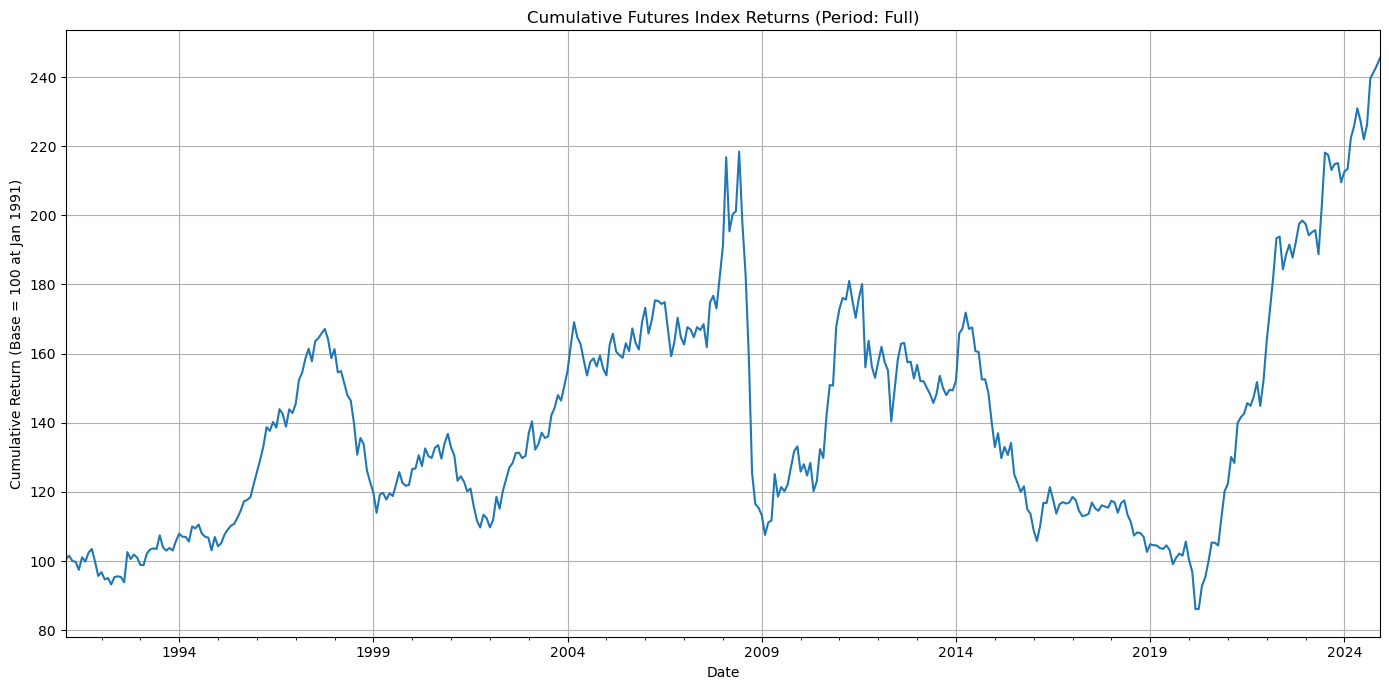

In [122]:
# plot ew_futures (not the value of the returns), but start at 100 and plot the cumulative returns
cumulative_futures_returns = (1 + ew_futures_returns).cumprod() * 100
cumulative_futures_returns.plot(figsize=(14, 7), title=f"Cumulative Futures Index Returns (Period: {period_choice})")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Base = 100 at Jan 1991)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [123]:
annualized_futures_return = ew_futures_returns.mean() * 12
print(f"My Annualized Futures Index Returns: {annualized_futures_return:.2%} \
      \nAnnualized Futures Index Returns from Original Paper: 5.09%\
      \nDifference: {annualized_futures_return - 0.0509:.2%}")

My Annualized Futures Index Returns: 3.48%       
Annualized Futures Index Returns from Original Paper: 5.09%      
Difference: -1.61%


#### Yearly rebalanced index:

Instead of rebalancing monthly, we can have the index rebalance once a year.

In [124]:
def calculate_annual_rebalance_returns(monthly_returns_df):
    """
    Calculates the monthly returns of a portfolio that is rebalanced annually.

    Args:
        monthly_returns_df (pd.DataFrame): DataFrame where each column is a
                                           commodity and each row is the monthly
                                           return for a given month.

    Returns:
        pd.Series: A Series of the portfolio's monthly returns.
    """
    # Drop any rows where all values are NaN, which typically occurs in the first
    # row after a pct_change() calculation. This prevents calculation errors.
    monthly_returns_df = monthly_returns_df.dropna(how='all')

    # Use the first valid index to start the portfolio
    start_index = monthly_returns_df.first_valid_index()
    if start_index is None:
        return pd.Series(dtype=float)

    # DataFrame to track the value of each holding
    portfolio_values = pd.DataFrame(index=monthly_returns_df.index, columns=monthly_returns_df.columns)

    # Initialize weights and starting portfolio value
    initial_value = 100
    num_assets = monthly_returns_df.shape[1]
    
    # Set the initial investment for each asset at the start date
    portfolio_values.loc[start_index] = initial_value / num_assets

    # Loop through the months, starting from the second month of the data
    for i in range(1, len(monthly_returns_df)):
        current_date = monthly_returns_df.index[i]
        prev_date = monthly_returns_df.index[i-1]
        
        # Get the previous month's values
        prev_values = portfolio_values.loc[prev_date]

        # Check if it's a rebalancing month (January)
        # We don't rebalance on the very first entry
        if current_date.month == 1 and current_date != start_index:
            # Rebalance Day
            # 1. First, calculate the value of holdings at the start of the rebalance day
            #    based on the previous day's value and the current month's return.
            current_returns = monthly_returns_df.loc[current_date].fillna(0)
            holdings_before_rebalance = prev_values * (1 + current_returns)
            
            # 2. Sum the holdings to get the new total portfolio value
            total_portfolio_value = holdings_before_rebalance.sum()

            # 3. Rebalance: Divide the total value equally among all assets
            portfolio_values.loc[current_date] = total_portfolio_value / num_assets
        
        else:
            # Non-Rebalancing Day
            # The value of each holding simply grows by its own return for the month
            current_returns = monthly_returns_df.loc[current_date].fillna(0)
            portfolio_values.loc[current_date] = prev_values * (1 + current_returns)

    # Calculate the total portfolio value for each month by summing the holdings
    total_portfolio_by_month = portfolio_values.sum(axis=1)

    # Calculate the monthly return of the total portfolio
    yearly_rebalanced_returns = total_portfolio_by_month.pct_change().dropna()
    
    return yearly_rebalanced_returns


# %%
# --- Calculate returns for annually rebalanced SPOT index ---
yearly_rebal_spot_returns = calculate_annual_rebalance_returns(spot_returns_df)
print("--- Annually Rebalanced Spot Index ---")
print(yearly_rebal_spot_returns.head())
annualized_yearly_rebal_spot_return = yearly_rebal_spot_returns.mean() * 12
print(f"\nMy Annualized (Yearly Rebalanced) Spot Index Returns: {annualized_yearly_rebal_spot_return:.2%}")
print(f"For comparison, Monthly Rebalanced Spot Index was: {annualized_spot_returns:.2%}")


# %%
# --- Calculate returns for annually rebalanced FUTURES index ---
# Note: We use the collateralized returns as the input here
yearly_rebal_futures_returns = calculate_annual_rebalance_returns(collateralized_futures_returns_df)
print("\n--- Annually Rebalanced Futures Index ---")
print(yearly_rebal_futures_returns.head())
annualized_yearly_rebal_futures_return = yearly_rebal_futures_returns.mean() * 12
print(f"\nMy Annualized (Yearly Rebalanced) Futures Index Returns: {annualized_yearly_rebal_futures_return:.2%}")
# print(f"For comparison, Monthly Rebalanced Futures Index was: {annualized_futures_return:.2%}")


--- Annually Rebalanced Spot Index ---
Exchange Date
1991-03-31    0.011918
1991-04-30   -0.007459
1991-05-31    0.003255
1991-06-30   -0.032726
1991-07-31    0.024420
Freq: ME, dtype: float64

My Annualized (Yearly Rebalanced) Spot Index Returns: 6.89%
For comparison, Monthly Rebalanced Spot Index was: 8.05%

--- Annually Rebalanced Futures Index ---
Exchange Date
1991-03-31    0.009607
1991-04-30   -0.014799
1991-05-31   -0.002053
1991-06-30   -0.022016
1991-07-31    0.032200
Freq: ME, dtype: float64

My Annualized (Yearly Rebalanced) Futures Index Returns: 5.40%


/var/folders/6p/889s42gx3jj45p0zs5159byr0000gn/T/ipykernel_24673/797289003.py:65: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/var/folders/6p/889s42gx3jj45p0zs5159byr0000gn/T/ipykernel_24673/797289003.py:65: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



### Adjusting for inflation
 Load the CPI data

In [125]:
inflation_cpi_df = pd.read_csv("data/ph-CPI-inflation.csv")
inflation_cpi_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,,
1,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,,
2,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,,
3,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6,,
4,1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7,,


In [126]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
inflation_cpi_long_df = inflation_cpi_df.melt(id_vars='Year', value_vars=months, var_name='Month', value_name='CPI')
inflation_cpi_long_df.head()

,Year,Month,CPI
0,1913,Jan,9.8
1,1914,Jan,10.0
2,1915,Jan,10.1
3,1916,Jan,10.4
4,1917,Jan,11.7


In [127]:
month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
             'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
inflation_cpi_long_df['MonthNum'] = inflation_cpi_long_df['Month'].map(month_map)

inflation_cpi_long_df['Exchange Date'] = pd.to_datetime(inflation_cpi_long_df['Year'].astype(int)*10000 + inflation_cpi_long_df['MonthNum']*100 + 1, format='%Y%m%d') + pd.offsets.MonthEnd(0)

inflation_cpi_long_df = inflation_cpi_long_df.set_index('Exchange Date').sort_index()

# If you want monthly inflation rates (percentage change)
# Replace blank strings or spaces with NaN before converting to float
inflation_cpi_long_df['CPI'] = inflation_cpi_long_df['CPI'].replace(r'^\s*$', np.nan, regex=True)
cpi_series = inflation_cpi_long_df['CPI'].astype(float)
monthly_inflation_cpi_df = cpi_series.pct_change().dropna()

monthly_inflation_cpi_df.head()

/var/folders/6p/889s42gx3jj45p0zs5159byr0000gn/T/ipykernel_24673/36317506.py:13: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



Exchange Date
1913-02-28    0.000000
1913-03-31    0.000000
1913-04-30    0.000000
1913-05-31   -0.010204
1913-06-30    0.010309
Name: CPI, dtype: float64

## Finding the real returns (adjust for inflation)

In [128]:
# Ensure monthly_inflation is aligned with your returns indices
aligned_inflation = monthly_inflation_cpi_df.reindex(ew_futures_returns.index).ffill()

# Calculate real (inflation-adjusted) returns
ew_real_futures_returns = ((1 + ew_futures_returns) / (1 + aligned_inflation)) - 1
ew_real_spot_returns = ((1 + ew_spot_returns) / (1 + aligned_inflation)) - 1

In [129]:
# Calculate cumulative real returns for plotting
cumulative_futures_performance = (1 + ew_real_futures_returns).cumprod() * 100
cumulative_spot_performance = (1 + ew_real_spot_returns).cumprod() * 100

print(f"Annualized Real Futures Index Returns: {ew_real_futures_returns.mean() * 12:.2%} \
        \nAnnualized Real Futures Index Returns from Original Paper: 2.93%\
        \nDifference: {ew_real_futures_returns.mean() * 12 - 0.0293:.2%}\
      \n\nAnnualized Real Spot Index Returns: {ew_real_spot_returns.mean() * 12:.2%} \
        \nAnnualized Real Spot Index Returns from Original Paper: 7.26%\
        \nDifference: {ew_real_spot_returns.mean() * 12 - 0.0726:.2%}")
      


Annualized Real Futures Index Returns: 0.93%         
Annualized Real Futures Index Returns from Original Paper: 2.93%        
Difference: -2.00%      

Annualized Real Spot Index Returns: 5.50%         
Annualized Real Spot Index Returns from Original Paper: 7.26%        
Difference: -1.76%


### Importing other data

SP500:

In [130]:
import yfinance as yf

# Download S&P 500 (^GSPC) data from Yahoo Finance
sp500_df = yf.download('^GSPC', start=start_date, end=end_date, interval='1d')
sp500_df = sp500_df[['Close']]  # Keep only the 'Close' column
sp500_df.index = pd.to_datetime(sp500_df.index)
sp500_monthly_df = sp500_df.resample('ME').last()  # Resample to get the last price of each month
# Show the first few rows
sp500_monthly_df.head()

/var/folders/6p/889s42gx3jj45p0zs5159byr0000gn/T/ipykernel_24673/805128324.py:4: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed



Price,Close
Ticker,^GSPC
Date,
1991-01-31,343.929993
1991-02-28,367.070007
1991-03-31,375.220001
1991-04-30,375.339996
1991-05-31,389.829987


Bonds:

In [131]:
corporate_bond_df = pd.read_csv("data/ph-ICE-BofA-US-Corporate-Index-TotalReturn.csv")
corporate_bond_df['observation_date'] = pd.to_datetime(corporate_bond_df['observation_date'])
corporate_bond_df = corporate_bond_df.set_index('observation_date')
corporate_bond_monthly_df = corporate_bond_df.resample('ME').last()
corporate_bond_monthly_df.head()


,BAMLCC0A0CMTRIV
observation_date,
1972-12-31,100.00
1973-01-31,100.00
1973-02-28,100.00
1973-03-31,100.46
1973-04-30,100.46


Adjust both for inflation

In [132]:
# adjust for inflation
corporate_bond_monthly_df['BAMLCC0A0CMTRIV'] = corporate_bond_monthly_df['BAMLCC0A0CMTRIV'].replace(r'^\s*$', np.nan, regex=True).astype(float)
corporate_bond_monthly_df['BAMLCC0A0CMTRIV'] = corporate_bond_monthly_df['BAMLCC0A0CMTRIV'].pct_change().dropna()
# Align the corporate bond returns with the futures returns index
corporate_bond_aligned = corporate_bond_monthly_df['BAMLCC0A0CMTRIV'].reindex(ew_futures_returns.index).ffill()
corporate_bond_aligned = corporate_bond_aligned.rename("returns")
corporate_bond_aligned.head()


Exchange Date
1991-02-28    0.012725
1991-03-31    0.012951
1991-04-30    0.013847
1991-05-31    0.008677
1991-06-30   -0.000745
Freq: ME, Name: returns, dtype: float64

In [133]:

# adjust sp500 for inflation
sp500_monthly_df['Close'] = sp500_monthly_df['Close'].replace(r'^\s*$', np.nan, regex=True).astype(float)
sp500_monthly_df['returns'] = sp500_monthly_df['Close'].pct_change().dropna()
# Align the S&P 500 returns with the futures returns index
sp500_aligned = sp500_monthly_df['returns'].reindex(ew_futures_returns.index).ffill()
sp500_aligned.head()


Exchange Date
1991-02-28    0.067281
1991-03-31    0.022203
1991-04-30    0.000320
1991-05-31    0.038605
1991-06-30   -0.047893
Freq: ME, Name: returns, dtype: float64

# Plots by paper

## 2. Erb & Harvey 2006

Unexpected inflation: there's a discepnacy between excpected and actual inflation (the means are very different). DO NOT USE

In [134]:
# inflation_series = monthly_inflation_cpi_df.copy()
# inflation_series.index = inflation_series.index.to_period('M')
# inflation_series.head()

# tbill_series = tbill_df['monthly_return'].copy()
# tbill_series.index = tbill_series.index.to_timestamp(how='end')
# tbill_series.index = tbill_series.index.to_period('M')

# # tbill_series.index = tbill_series.index.to_period('M')
# # tbill_series['Month'] = pd.to_datetime(tbill_series['Month'])
# # tbill_series.head()

# inflation_analysis_df = pd.DataFrame({
#     'Actual Inflation': inflation_series,
#     'Expected Inflation': tbill_series
# })

# # inflation_analysis_df.head()

# inflation_analysis_df['Unexpected Inflation'] = inflation_analysis_df['Actual Inflation'] - inflation_analysis_df['Expected Inflation']

# inflation_analysis_df.head()

## 3. 2015/06 Gorton & Rouwenhorst: Facts and fantasies about commodities futures 10 years later.

### Default Spread

The default spread measures the difference in yield between corporate bonds and risk-free government bonds of similar maturity. A wider spread indicates higher perceived risk in the corporate sector and a lower risk appetite among investors. The most common measure is the spread between Baa-rated corporate bonds and U.S. Treasury bonds.
What You Need to Calculate:


Default Spread at time t:

`Default Spread_t​=(Yield on Baa Corporate Bonds)_t​−(Yield on 10-Year U.S. Treasury Bonds)_t`


Data Sources:
- Baa Corporate Bonds: https://fred.stlouisfed.org/series/BAA
- 10 year US Treasury Yields: https://fred.stlouisfed.org/series/GS10



In [135]:
baa_bonds_df = pd.read_csv('data/default-spread-data/baa-corp-yields.csv')
baa_bonds_df['observation_date'] = pd.to_datetime(baa_bonds_df['observation_date'])
baa_bonds_df = baa_bonds_df.set_index('observation_date')
baa_bonds_monthly_df = baa_bonds_df.resample('ME').last()
baa_bonds_df.head()

,BAA
observation_date,
1919-01-01,7.12
1919-02-01,7.20
1919-03-01,7.15
1919-04-01,7.23
1919-05-01,7.09


In [136]:
ten_year_treasury_yields_df = pd.read_csv('data/default-spread-data/treasury-yields-10year.csv')
ten_year_treasury_yields_df['observation_date'] = pd.to_datetime(ten_year_treasury_yields_df['observation_date'])
ten_year_treasury_yields_df = ten_year_treasury_yields_df.set_index('observation_date')
ten_year_treasury_yields_monthly_df = ten_year_treasury_yields_df.resample('ME').last()
ten_year_treasury_yields_monthly_df.head()

,GS10
observation_date,
1953-04-30,2.83
1953-05-31,3.05
1953-06-30,3.11
1953-07-31,2.93
1953-08-31,2.95


In [137]:
default_spread_df = pd.DataFrame({
    'BAA Spread': baa_bonds_monthly_df['BAA'],
    '10Y Treasury Yield': ten_year_treasury_yields_monthly_df['GS10']
})
default_spread_df['Default Spread'] = default_spread_df['BAA Spread'] - default_spread_df['10Y Treasury Yield']
default_spread_df = default_spread_df.dropna()  # Drop rows with NaN
default_spread_df.head()

,BAA Spread,10Y Treasury Yield,Default Spread
observation_date,,,
1953-04-30,3.65,2.83,0.82
1953-05-31,3.78,3.05,0.73
1953-06-30,3.86,3.11,0.75
1953-07-31,3.86,2.93,0.93
1953-08-31,3.85,2.95,0.90


make default spread yearly

In [138]:
yearly_default_spread_series = default_spread_df['Default Spread'].resample('YE').mean()
# yearly_default_spread_series.head()
# plt.figure(figsize=(14, 7))
# plt.plot(yearly_default_spread_series.index, yearly_default_spread_series, label='Default Spread (BAA - 10Y Treasury)', color='orange')
# plt.title('Default Spread Over Time')
# plt.xlabel('Date')
# plt.ylabel('Default Spread (%)')    

### Comovements:
#### 1. Over all years

In [139]:
# import seaborn as sns

# # Loop through all defined periods and compute the correlation matrix and average correlation for each
# for period_name, (start_str, end_str) in periods.items():
    
#     # Filter the returns DataFrame for the current period
#     period_returns = set_period_for_df(period_name, periods, collateralized_futures_returns_df)
#     print(f"{period_name}: period_returns shape = {period_returns.shape}, non-NaN count = {period_returns.count().sum()}")
#     # Compute the correlation matrix
#     corr_matrix = period_returns.corr()
    
#     # Compute the average correlation (excluding diagonals)
#     corr_matrix_copy = corr_matrix.copy()
#     np.fill_diagonal(corr_matrix_copy.values, np.nan)
#     average_corr = corr_matrix_copy.unstack().mean()
#     corr_values = corr_matrix_copy.unstack().dropna()
#     period_str = return_period_str(period_name, periods)
#     print(f"{period_str}: Average correlation (excluding diagonals): {average_corr:.3f}")
    
#     # Plot the heatmap for each period
#     plt.figure(figsize=(14, 10))
#     sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
#     plt.title(f"Pairwise Correlation Matrix of Collateralized Futures Returns\n {period_str}")
#     # 
#     # plt.show()

In [140]:
import plotly.graph_objects as go
import numpy as np

# --- Create a mapping from the full commodity name to the short name ---
full_to_short_map = {name: name.split(' (')[0].replace('-1', '').replace('ph-', '') for name in collateralized_futures_returns_df.columns}

# --- Pre-calculate the average correlation for each period ---
avg_correlations = {}
for period_name in periods.keys():
    period_returns = set_period_for_df(period_name, periods, collateralized_futures_returns_df)
    period_returns = period_returns.dropna(axis=1, how='all')
    corr_matrix = period_returns.corr()
    
    # Calculate the average correlation, excluding the diagonal
    corr_matrix_copy = corr_matrix.copy()
    np.fill_diagonal(corr_matrix_copy.values, np.nan)
    average_corr = corr_matrix_copy.unstack().mean()
    
    # Store the formatted string
    avg_correlations[period_name] = f"<b>Avg. Correlation: {average_corr:.3f}</b>"

# --- Create the interactive figure ---
fig = go.Figure()

# Loop through all defined periods to add a heatmap trace for each one
for period_name in periods.keys():
    period_returns = set_period_for_df(period_name, periods, collateralized_futures_returns_df)
    period_returns = period_returns.dropna(axis=1, how='all')
    corr_matrix = period_returns.corr()
    short_labels = [full_to_short_map[name] for name in corr_matrix.columns]
    period_str = return_period_str(period_name, periods)

    fig.add_trace(
        go.Heatmap(
            z=corr_matrix.values,
            x=short_labels,
            y=short_labels,
            colorscale='RdBu_r',
            zmid=0,
            visible=(period_name == "Full"),
            name=period_str
        )
    )

# --- Create the dropdown menu buttons ---
buttons = []
for i, period_name in enumerate(periods.keys()):
    period_str = return_period_str(period_name, periods)
    visibility = [False] * len(periods)
    visibility[i] = True
    
    buttons.append(
        dict(
            label=period_str,
            method="update",
            # Args now update visibility, title, AND the annotation text
            args=[
                {"visible": visibility},
                {
                    "title": f"Pairwise Correlation of Collateralized Futures Returns<br>{period_str}",
                    "annotations[0].text": avg_correlations[period_name]
                }
            ]
        )
    )

# --- Update the layout with the dropdown, title, AND a placeholder annotation ---
fig.update_layout(
    title_text=f"Pairwise Correlation of Collateralized Futures Returns<br>{return_period_str('Full', periods)}",
    width=900,
    height=800,
    xaxis_tickangle=-45,
    xaxis=dict(
        tickfont=dict(
            size=14,  # Set your desired font size here
            color='black',  # Set your desired font color here
            family = 'Arial'
        )
    ),
    # If you also want to update y-axis ticks font size:
    yaxis=dict(
        tickfont=dict(
            size=14,  # Set your desired font size here
            color='black',  # Set your desired font color here
            family = 'Arial'
        )
    ),
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.7,
            xanchor="left",
            y=1.12,
            yanchor="top"
        )
    ],
    # Add the annotation object here
    annotations=[
        dict(
            text=avg_correlations['Full'], # Initial text
            showarrow=False,
            xref="paper", yref="paper",
            x=0.99, y=1.03
        )
    ]
)

fig.show()

In [141]:
print(full_to_short_map)

{'ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1)': 'cocoa', 'ph-coffee-1 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 1)': 'coffee', 'ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1)': 'copper', 'ph-corn-1 (CBoT Corn Composite Commodity Future)': 'corn', 'ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1)': 'cotton', 'ph-crude-oil-1 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 1)': 'crude-oil', 'ph-gasoline-1 (NYMEX RBOB Gasoline Electronic Energy Future Continuation 1)': 'gasoline', 'ph-gold-1 (COMEX Gold Electronic Commodity Future Continuation 1)': 'gold', 'ph-heating-oil-1 (NYMEX NY Harbor ULSD Electronic Energy Future Continuation 1)': 'heating-oil', 'ph-lean-hogs-1 (CME Lean Hogs Electronic Commodity Future Continuation 1)': 'lean-hogs', 'ph-live-cattle-1 (CME Live Cattle Electronic Commodity Future Continuation 1)': 'live-cattle', 'ph-natgas-1 (NY

#### 2. Timeseries (averaged over year)

In [142]:
# Create a time series of average pairwise correlations for each year
avg_corr_by_year = {}

# Group by year
for year, group in collateralized_futures_returns_df.groupby(collateralized_futures_returns_df.index.year):
    corr_matrix = group.corr()
    # Exclude diagonal (self-correlation)
    corr_values = corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)]
    avg_corr = np.nanmean(corr_values)
    avg_corr_by_year[year] = avg_corr

# Convert to pandas Series for easy plotting/analysis
avg_corr_by_year_series = pd.Series(avg_corr_by_year)
# Set index to year-end for easier alignment with yearly_default_spread_series
avg_corr_by_year_series.index = pd.to_datetime(avg_corr_by_year_series.index.astype(str) + '-12-31')
avg_corr_by_year_series.name = "Average Pairwise Correlation"

avg_corr_by_year_series.head()
yearly_default_spread_series.head()

temp_end_date = avg_corr_by_year_series.index.max() 
print(f"Period: {period_str} from {start_date} to {end_date}")


Period: Post-Covid: 2020-2025 from 1991-01-01 00:00:00 to 2025-01-01 00:00:00


In [143]:
avg_corr_by_year_series.head()
# yearly_default_spread_series.head()

1991-12-31    0.089845
1992-12-31    0.086484
1993-12-31    0.060404
1994-12-31    0.057222
1995-12-31    0.016968
Name: Average Pairwise Correlation, dtype: float64

In [144]:


# # start_date = pd.to_datetime("2004-01-01")
# # end_date = pd.to_datetime("2015-04-01")

# import statsmodels.api as sm


# for period_name, (start_str, end_str) in periods.items():
    
#     fig, ax1 = plt.subplots(figsize=(12, 6))
#     period_str = return_period_str(period_name, periods)
#     # temp_start_date, temp_end_date = set_period(period_name, periods)
#     temp_start_date = pd.to_datetime(start_str) 
#     temp_end_date = min(avg_corr_by_year_series.index.max() , pd.to_datetime(end_str))
    
#     corr_series = avg_corr_by_year_series.loc[temp_start_date:temp_end_date]
#     default_spread_series = yearly_default_spread_series.loc[temp_start_date:temp_end_date]
    
#     # Convert both indices to year (as integer)
#     corr_series.index = corr_series.index.year
#     default_spread_series.index = default_spread_series.index.year
    
#     # Align on year and drop any missing values
#     common_years = corr_series.index.intersection(default_spread_series.index)
#     aligned_corr = corr_series.loc[common_years]
#     aligned_default_spread = default_spread_series.loc[common_years]
    
#     # Calculate Pearson correlation
#     correlation = aligned_corr.corr(aligned_default_spread)
#     print(f"Correlation between average commodity comovement and default spread ({period_str}): {correlation:.3f}")

#     color = 'tab:blue'
#     ax1.set_xlabel('Year')
#     ax1.set_ylabel('Correlation', color=color)
#     ax1.plot(avg_corr_by_year_series.index, avg_corr_by_year_series, color=color, label='Commodity Comovement')
#     ax1.tick_params(axis='y', labelcolor=color)
#     # ax1.set_ylim(0, 0.55)
#     ax1.set_xlim(temp_start_date, temp_end_date)

#     # Secondary y-axis for default spread
#     ax2 = ax1.twinx()
#     color = 'tab:red'
#     ax2.set_ylabel('Default spread', color=color)
#     ax2.plot(yearly_default_spread_series.index, yearly_default_spread_series, color=color, label='Default Spread')
#     ax2.tick_params(axis='y', labelcolor=color)
#     ax2.set_ylim(1.3, 4.5)


#     # Title and legend
#     # plt.figure(figsize=(14, 10))
#     plt.title(f'Average Default Spread and Commodity Co-movement \n{period_str}')
#     fig.tight_layout()
#     # plt.show()



In [145]:
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# import pandas as pd
# import numpy as np

# # --- 1. Prepare the yearly data (same as your original code) ---
# # (Assuming avg_corr_by_year_series and yearly_default_spread_series are already created)

# # --- 2. Pre-calculate the correlation statistic for each period (CORRECTED) ---



# correlations = {}
# for period_name, (start_str, end_str) in periods.items():
#     temp_start_date = pd.to_datetime(start_str)
#     temp_end_date = min(avg_corr_by_year_series.index.max(), pd.to_datetime(end_str))
    
#     # Slice data for the period
#     corr_series_period = avg_corr_by_year_series.loc[temp_start_date:temp_end_date].copy()
#     default_spread_period = yearly_default_spread_series.loc[temp_start_date:temp_end_date].copy()
    
#     # --- FIX: Align the data by integer year before calculating correlation ---
#     corr_series_period.index = corr_series_period.index.year
#     default_spread_period.index = default_spread_period.index.year
    
#     # Find common years and slice the series to ensure they are perfectly aligned
#     common_years = corr_series_period.index.intersection(default_spread_period.index)
#     aligned_corr = corr_series_period.loc[common_years]
#     aligned_default_spread = default_spread_period.loc[common_years]

#     # Calculate Pearson correlation on the correctly aligned series
#     correlation = aligned_corr.corr(aligned_default_spread)
#     correlations[period_name] = f"<b>Correlation: {correlation:.3f}</b>"


# # --- 3. Create the interactive Plotly figure (No changes needed here) ---
# fig = make_subplots(specs=[[{"secondary_y": True}]])

# for period_name, (start_str, end_str) in periods.items():
#     period_str = return_period_str(period_name, periods)
#     temp_start_date = pd.to_datetime(start_str)
#     temp_end_date = min(avg_corr_by_year_series.index.max(), pd.to_datetime(end_str))
    
#     corr_series_period = avg_corr_by_year_series.loc[temp_start_date:temp_end_date]
#     default_spread_series_period = yearly_default_spread_series.loc[temp_start_date:temp_end_date]
    
#     is_visible = (period_name == "Full")

#     fig.add_trace(go.Scatter(x=corr_series_period.index, y=corr_series_period, name='Commodity Co-movement', line=dict(color='royalblue'), visible=is_visible), secondary_y=False)
#     fig.add_trace(go.Scatter(x=default_spread_series_period.index, y=default_spread_series_period, name='Default Spread', line=dict(color='firebrick'), visible=is_visible), secondary_y=True)

# # --- 4. Create the dropdown menu buttons (No changes needed here) ---
# buttons = []
# num_traces_per_period = 2
# for i, period_name in enumerate(periods.keys()):
#     period_str = return_period_str(period_name, periods)
#     visibility = [False] * len(periods) * num_traces_per_period
#     visibility[i * num_traces_per_period] = True
#     visibility[i * num_traces_per_period + 1] = True
    
#     buttons.append(dict(label=period_str, method="update", args=[{"visible": visibility}, {"title": f"Average Default Spread and Commodity Co-movement<br>{period_str}", "annotations[0].text": correlations[period_name]}]))

# # --- 5. Update the layout (No changes needed here) ---
# fig.update_layout(
#     title_text=f"Average Default Spread and Commodity Co-movement<br>{return_period_str('Full', periods)}",
#     xaxis_title="Year",
#     legend=dict(orientation="h", yanchor="bottom", y=1.07, xanchor="right", x=1),
#     updatemenus=[dict(active=0, buttons=buttons, direction="down", pad={"r": 10, "t": 10}, showactive=True, x=0.01, xanchor="left", y=1.16, yanchor="top")],
#     annotations=[dict(text=correlations['Full'], showarrow=False, xref="paper", yref="paper", x=0.99, y=1.1)]
# )
# fig.update_yaxes(
#     title_text="Correlation", 
#     secondary_y=False,
#     range = [0.0, 0.55],
#     dtick = 0.1
#     )
# fig.update_yaxes(
#     title_text="Default Spread",
#     secondary_y=True,
#     range = [1.5, 4.25],
#     dtick = 0.5
#     )

# fig.show()

In [146]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

# Define the three periods for background coloring
period_colors = {
    "Pre-Financialization": ["1991-01-01", "2005-01-01","rgba(144, 238, 144, 0.3)"],   # Light green
    "Financialization": ["2005-01-01", "2015-01-01", "rgba(255, 182, 193, 0.3)"],      # Light pink
    "Post-Financialization": ["2015-01-01", "2025-01-01",  "rgba(135, 206, 235, 0.3)"] # Light blue
}

# Calculate correlations for each period
correlations = {}
for period_name, period_info in period_colors.items():
    start_str, end_str = period_info[0], period_info[1]
    temp_start_date = pd.to_datetime(start_str)
    temp_end_date = min(avg_corr_by_year_series.index.max(), pd.to_datetime(end_str))
    
    # Slice data for the period
    corr_series_period = avg_corr_by_year_series.loc[temp_start_date:temp_end_date].copy()
    default_spread_period = yearly_default_spread_series.loc[temp_start_date:temp_end_date].copy()
    
    # Align the data by integer year before calculating correlation
    corr_series_period.index = corr_series_period.index.year
    default_spread_period.index = default_spread_period.index.year
    
    # Find common years and slice the series to ensure they are perfectly aligned
    common_years = corr_series_period.index.intersection(default_spread_period.index)
    aligned_corr = corr_series_period.loc[common_years]
    aligned_default_spread = default_spread_period.loc[common_years]

    # Calculate Pearson correlation on the correctly aligned series
    correlation = aligned_corr.corr(aligned_default_spread)
    correlations[period_name] = correlation

# Create the figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Use the full period data
full_start = pd.to_datetime("1991-01-01")
full_end = min(avg_corr_by_year_series.index.max(), pd.to_datetime("2025-01-01"))

corr_series_full = avg_corr_by_year_series.loc[full_start:full_end]
default_spread_series_full = yearly_default_spread_series.loc[full_start:full_end]

# Add the main data traces
fig.add_trace(
    go.Scatter(
        x=corr_series_full.index, 
        y=corr_series_full, 
        name='Commodity Co-movement', 
        line=dict(color='royalblue', width=2),
        hovertemplate='Year: %{x}<br>Correlation: %{y:.3f}<extra></extra>'
    ), 
    secondary_y=False
)

fig.add_trace(
    go.Scatter(
        x=default_spread_series_full.index, 
        y=default_spread_series_full, 
        name='Default Spread', 
        line=dict(color='firebrick', width=2),
        hovertemplate='Year: %{x}<br>Default Spread: %{y:.3f}<extra></extra>'
    ), 
    secondary_y=True
)

# Add background shading for each period
for period_name, period_info in period_colors.items():
    start_str, end_str, color = period_info
    start_date = pd.to_datetime(start_str)
    end_date = pd.to_datetime(end_str)
    
    # Add vertical rectangles for background shading
    fig.add_vrect(
        x0=start_date,
        x1=end_date,
        fillcolor=color,
        opacity=0.5,
        layer="below",
        line_width=0,
    )

# Update layout
period_str = return_period_str('Full', periods)


fig.update_layout(
    title_text=f"Average Default Spread and Commodity Co-movement<br>{period_str}",
    xaxis_title="Year",
    legend=dict(orientation="h", yanchor="bottom", y=1.07, xanchor="right", x=1),
    width=1000,
    height=600,
    # margin=dict(l=150, r=80, t=120, b=80)  # Add this line
)

# Add annotations directly inside each shaded region
for period_name, correlation_value in correlations.items():
    # Get the start and end dates for the period
    start_date_str = period_colors[period_name][0]
    end_date_str = period_colors[period_name][1]
    
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    
    # Calculate the midpoint for the label's x-position
    # Note: For the last period, we place it slightly earlier to avoid the edge
    if period_name == "Post-Financialization":
        label_x_position = pd.to_datetime("2020-01-01")
    else:
        label_x_position = start_date + (end_date - start_date) / 2

    fig.add_annotation(
        x=label_x_position,
        y=0.58,  # Position the label vertically near the top
        text=f"<b>{period_name.replace('-', ' ')}</b><br>r = {correlation_value:.3f}",
        showarrow=False,
        font=dict(
            color="black",
            size=12
        ),
        align="center",
        yanchor="top" # Anchor the text from its top edge
    )

# Update y-axes
fig.update_yaxes(
    title_text="Correlation", 
    secondary_y=False,
    range=[0.0, 0.6],
    dtick=0.1,
    ticklabelstandoff=5  # Distance between axis and tick labels
    # title_standoff=20
)
fig.update_yaxes(
    title_text="Default Spread",
    secondary_y=True,
    range=[1.5, 4.5],
    ticklabelstandoff=5,
    dtick=0.5,
    # title_standoff=20
)

fig.update_xaxes(
    ticklabelstandoff = 5,
    autorange = True,
    rangemode = 'normal'
    # range = []
)

fig.show()

#### Fraction of commodities in backwardation (fig 4 and fig 5)

A market is in backwardation when the price of a futures contract with a nearby expiration date is higher than the price of a contract with a more distant expiration date. The term structure curve slopes downwards.

In [147]:
# # daily closes for both front and second month
# front_closes_df = front_closes_df.loc[start_date:end_date]
# second_closes_df = second_closes_df.loc[start_date:end_date]


# front_monthly_closes_df = front_monthly_closes_df.loc[start_date:end_date]
# second_monthly_closes_df = second_monthly_closes_df.loc[start_date:end_date]

In [148]:
# # backwardation_status_df shows true when a commodity is in backwardation, false when in contango, and NaN when data is missing for each commodity each day
# backwardation_status_df = pd.DataFrame(index=front_monthly_closes_df.index)

# for idx in range(len(front_monthly_closes_df.columns)):
#     col_front = front_monthly_closes_df.columns[idx]
#     col_second = second_monthly_closes_df.columns[idx] if idx < len(second_monthly_closes_df.columns) else None
#     # Extract a short commodity name for easier display
#     short_name = col_front.split('(')[0].replace('-1', '').replace('-2', '').strip()
#     short_name = short_name.replace('ph-', '').replace('-', '_')
    
#     if col_second is not None:
#         front_series = front_monthly_closes_df[col_front]
#         second_series = second_monthly_closes_df[col_second]
#         # Set to NaN if either value is NaN, else compare
#         status = front_series.gt(second_series) & front_series.notna() & second_series.notna()
#         status = status.where(front_series.notna() & second_series.notna(), np.nan)
#         backwardation_status_df[short_name] = status
#     else:
#         backwardation_status_df[short_name] = np.nan

In [149]:
# # 1. .stack() is still correct for pooling the data into a single column.
# stacked_series = backwardation_status_df.stack()

# # 2. THE FIX: Instead of .resample(), we use .groupby().
# # We tell it to group by the first level of the index (level=0), which is the dates,
# # and to create monthly groups using pd.Grouper(freq='ME').
# # Then, .mean() calculates the fraction for each month's pooled data.
# backwardation_fraction = stacked_series.groupby(pd.Grouper(level=0, freq='ME')).mean()

# backwardation_fraction

In [150]:
# # --- Plot Figure 4: Fraction of Commodities in Backwardation ---
# plt.figure(figsize=(14, 7))
# backwardation_fraction.plot(label='Fraction of Commodities in Backwardation', color='blue')

# # Add a horizontal line for the lifetime average
# lifetime_average = backwardation_fraction.mean()
# plt.axhline(y=lifetime_average, color='orange', linestyle='--', label=f'Lifetime Average ({lifetime_average:.2%})')

# # Formatting the plot
# plt.title('Figure 4 Reproduction: Fraction of Commodities in Backwardation')
# plt.xlabel('Date')
# plt.ylabel('Fraction (%)')
# plt.ylim(0, 1)  # Y-axis from 0% to 100%
# plt.legend()
# plt.grid(True)

# plt.show()






In [172]:
period_colors = {
    "Pre-Financialization": ["1991-01-01", "2005-01-01", "rgba(144, 238, 144, 0.3)"],
    "Financialization": ["2005-01-01", "2015-01-01", "rgba(255, 182, 193, 0.3)"],
    "Post-Financialization": ["2015-01-01", "2025-01-01",  "rgba(135, 206, 235, 0.3)"]
}
first_period_start = pd.to_datetime(period_colors[list(period_colors.keys())[0]][0])
last_period_end = pd.to_datetime(period_colors[list(period_colors.keys())[-1]][1])
print(first_period_start)
print(last_period_end)



1991-01-01 00:00:00
2025-01-01 00:00:00


In [186]:

# To ensure a direct comparison is safe, we'll assign the column names from the front-month
# dataframe to the second-month dataframe. This makes the comparison robust.
second_aligned_df = second_monthly_closes_df.copy()
second_aligned_df.columns = front_monthly_closes_df.columns

# Now, we can directly compare the two dataframes.
front_aligned_df = front_monthly_closes_df

# Calculate backwardation status (True if front > second)
# The .values ensures the operation is element-wise without index/column alignment issues
backwardation_status_df = pd.DataFrame(
    front_aligned_df.values > second_aligned_df.values,
    index=front_aligned_df.index,
    columns=front_aligned_df.columns
)

backwardation_status_df = set_period_for_df('Full', periods, backwardation_status_df)

# Handle cases where data might be missing in one of the series
backwardation_status_df = backwardation_status_df.where(front_aligned_df.notna() & second_aligned_df.notna(), np.nan)


# --- Step 3: Calculate the Fraction of Commodities in Backwardation ---
# For each month, we calculate the percentage of commodities that are in backwardation.
# .mean(axis=1) on a boolean DataFrame conveniently gives the fraction of True values.
backwardation_fraction_fresh = backwardation_status_df.mean(axis=1).dropna()

# --- DEBUG: Check the final calculated series ---
print("--- Debugging Information ---")
print(f"Shape of front_monthly_closes_df: {front_monthly_closes_df.shape}")
print(f"Shape of second_monthly_closes_df: {second_monthly_closes_df.shape}")
print(f"Length of the final 'backwardation_fraction_fresh' series: {len(backwardation_fraction_fresh)}")
if len(backwardation_fraction_fresh) > 0:
    print("Head of the final series:")
    print(backwardation_fraction_fresh.head())
else:
    print("The final series is empty. No data will be plotted.")
print("--- End of Debugging ---")


# --- Step 4: Create the Plotly Visualization (inspired by the example) ---
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the three periods for background coloring
period_colors = {
    "Pre-Financialization": ["1991-01-01", "2005-01-01", "rgba(144, 238, 144, 0.3)"],
    "Financialization": ["2005-01-01", "2015-01-01", "rgba(255, 182, 193, 0.3)"],
    "Post-Financialization": ["2015-01-01", "2025-01-01",  "rgba(135, 206, 235, 0.3)"]
}

# Calculate the average fraction for each period
period_averages = {}
if not backwardation_fraction_fresh.empty:
    for period_name, (start_str, end_str, _) in period_colors.items():
        start_date = pd.to_datetime(start_str)
        end_date = pd.to_datetime(end_str)
        period_data = backwardation_fraction_fresh.loc[start_date:end_date]
        period_averages[period_name] = period_data.mean()

# Create the figure
fig = go.Figure()

# Add the main data trace
fig.add_trace(
    go.Scatter(
        x=backwardation_fraction_fresh.index,
        y=backwardation_fraction_fresh,
        name='Fraction in Backwardation',
        line=dict(color='royalblue', width=2),
        hovertemplate='Date: %{x|%Y-%m-%d}<br>Fraction: %{y:.2%}<extra></extra>'
    )
)

# Add the lifetime average line
if not backwardation_fraction_fresh.empty:
    lifetime_average = backwardation_fraction_fresh.mean()
    fig.add_trace(
        go.Scatter(
            x=backwardation_fraction_fresh.index,
            y=[lifetime_average] * len(backwardation_fraction_fresh),
            name=f'Lifetime Average ({lifetime_average:.2%})',
            line=dict(color='orange', dash='dash'),
            hoverinfo='skip'
        )
    )

# Add background shading and annotations for each period
if not backwardation_fraction_fresh.empty:
    for period_name, (start_str, end_str, color) in period_colors.items():
        start_date = pd.to_datetime(start_str)
        end_date = pd.to_datetime(end_str)
        
        fig.add_vrect(
            x0=start_date, x1=end_date,
            fillcolor=color, opacity=0.5, layer="below", line_width=0,
        )
        
        avg_value = period_averages.get(period_name)
        if avg_value is not None:
            label_x_position = start_date + (end_date - start_date) / 2
            if period_name == "Post-Financialization":
                label_x_position = pd.to_datetime("2020-01-01")

            # Calculate percentage difference from lifetime average
            if lifetime_average != 0 and avg_value is not None:
                pct_diff = (avg_value - lifetime_average)  * 100
                color = "green" if pct_diff > 0 else "red"
                diff_text = f' <span style="color:{color}">({pct_diff:+.1f}%)</span>'
            else:
                diff_text = ""
            fig.add_annotation(
                x=label_x_position, y=0.95,
                text=f"<b>{period_name}</b><br>Period Avg: {avg_value:.2%}{diff_text}",
                showarrow=False, font=dict(color="black", size=12),
                align="center", yanchor="top"
            )

# Update layout
fig.update_layout(
    title_text="Figure 4: Fraction of Commodities in Backwardation (Corrected Calculation)",
    xaxis_title="Date",
    yaxis_title="Fraction of Commodities (%)",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    width=1000, height=600,
    yaxis=dict(range=[0, 1], tickformat=".0%"),
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=5, label="5y", step="year", stepmode="backward"),
                dict(count=10, label="10y", step="year", stepmode="backward"),
                dict(count=34, label="34y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True), type="date"
    )

)
# fig.update_xaxes(
#     range=[(period_colors[list(period_colors.keys())[0]][0]),period_colors[list(period_colors.keys())[-1]][1]] # make it start at 199
# )

fig.show()

--- Debugging Information ---
Shape of front_monthly_closes_df: (629, 23)
Shape of second_monthly_closes_df: (629, 23)
Length of the final 'backwardation_fraction_fresh' series: 408
Head of the final series:
Exchange Date
1991-01-31    0.318182
1991-02-28    0.272727
1991-03-31    0.227273
1991-04-30    0.227273
1991-05-31    0.318182
Freq: ME, dtype: object
--- End of Debugging ---


In [189]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import plotly.graph_objects as go

# --- START: Complete and working code for Figure 5 ---

print("--- Preparing Data for Figure 5 using statsmodels ---")

# 1. Combine the two series into a single DataFrame.
# This is the crucial step that aligns the data by the date index.
next_month_futures_returns = ew_futures_returns.shift(-1)
fig5_data = pd.DataFrame({
    'fraction_in_backwardation': backwardation_fraction,
    'next_month_index_return': next_month_futures_returns
})

# 2. Drop any rows where either value is missing.
fig5_data.dropna(inplace=True)


# 3. **CRUCIAL FIX**: Check if we have enough data to run a regression.
# A regression requires at least two data points. This prevents all previous errors.
if len(fig5_data) < 2:
    print("\n--- ERROR ---")
    print("Cannot create Figure 5. After aligning the two data series, there are fewer than 2 overlapping data points.")
    print("This is likely due to a mismatch in the date ranges of your source data.")
    print(f"Number of data points available: {len(fig5_data)}")

else:
    print(f"Successfully created a dataset with {len(fig5_data)} overlapping monthly data points.")

    # 4. Prepare variables for statsmodels.
    # y is the dependent variable (what we're trying to predict).
    # X is the independent variable (the predictor).
    y = fig5_data['next_month_index_return']
    X_series = fig5_data['fraction_in_backwardation']
    
    # --- FIX for ValueError: Ensure data is numeric ---
    # Convert to numeric, coercing errors will turn non-numeric values into NaN
    y = pd.to_numeric(y, errors='coerce')
    X_series = pd.to_numeric(X_series, errors='coerce')

    # Drop NaN values from both series to keep them aligned
    combined = pd.concat([y, X_series], axis=1).dropna()
    y = combined['next_month_index_return']
    X_series = combined['fraction_in_backwardation']
    # --- End of Fix ---

    # Unlike other libraries, statsmodels requires you to explicitly add a constant
    # to the independent variable to calculate the intercept (y = mx + c).
    X = sm.add_constant(X_series)

    # 5. Fit the Ordinary Least Squares (OLS) regression model.
    model = sm.OLS(y, X).fit()

    # 6. Print the detailed regression summary.
    # This is the main advantage of statsmodels - it provides a rich, publication-quality output.
    print("\n--- OLS Regression Results ---")
    print(model.summary())
    
    # 7. Create the Plotly plot.
    fig = go.Figure()
    
    # Add the scatter plot for the monthly data
    fig.add_trace(go.Scatter(
        x=fig5_data['fraction_in_backwardation'],
        y=fig5_data['next_month_index_return'],
        mode='markers',
        name='Monthly Data',
        marker=dict(color='royalblue', opacity=0.6),
        hovertemplate='Fraction: %{x:.2%}<br>Return: %{y:.2%}<extra></extra>'
    ))
    
    # Add the regression line
    fig.add_trace(go.Scatter(
        x=fig5_data['fraction_in_backwardation'],
        y=model.predict(X),
        mode='lines',
        name='Regression Line',
        line=dict(color='firebrick', width=2)
    ))

    # 8. Extract statistics for annotation
    intercept = model.params['const']
    slope = model.params['fraction_in_backwardation']
    r_squared = model.rsquared
    t_slope = model.tvalues['fraction_in_backwardation']
    
    annotation_text = (
        f"<b>Regression Results</b><br>"
        f"Next Month Return = {intercept:.2%} + {slope:.2f} * (Fraction)<br>"
        f"t-statistic (slope): {t_slope:.2f}<br>"
        f"R-squared: {r_squared:.3f}"
    )
    
    # 9. Update layout and add annotation
    fig.update_layout(
        title='Figure 5: Backwardation vs. Next Month Index Return (Plotly)',
        xaxis_title='% of Commodities in Backwardation (Market-Wide Fraction)',
        yaxis_title='Next Month Index Return',
        xaxis=dict(tickformat=".0%"),
        yaxis=dict(tickformat=".2%"),
        legend=dict(x=0.01, y=0.99, yanchor="top", xanchor="left"),
        width=1000,
        height=700,
        annotations=[
            go.layout.Annotation(
                text=annotation_text,
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0.02,
                y=0.02,
                bordercolor="black",
                borderwidth=1,
                bgcolor="rgba(255, 255, 204, 0.8)"
            )
        ]
    )

    fig.show()

# --- END OF CODE BLOCK ---

--- Preparing Data for Figure 5 using statsmodels ---
Successfully created a dataset with 119 overlapping monthly data points.

--- OLS Regression Results ---
                               OLS Regression Results                              
Dep. Variable:     next_month_index_return   R-squared:                       0.041
Model:                                 OLS   Adj. R-squared:                  0.033
Method:                      Least Squares   F-statistic:                     4.994
Date:                     Thu, 10 Jul 2025   Prob (F-statistic):             0.0273
Time:                             15:01:59   Log-Likelihood:                 236.93
No. Observations:                      119   AIC:                            -469.9
Df Residuals:                          117   BIC:                            -464.3
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
 

#### Average correlation of Commodities with Equally Wighted Index by Sector

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_correlation_by_sector(collateralized_futures_returns_df, periods):
    """
    Create a plot showing average correlation of commodities with equally weighted index by sector,
    comparing different time periods (like Figure 6 from the paper).
    
    Parameters:
    collateralized_futures_returns_df: DataFrame with commodity returns
    periods: Dict with period definitions
    """
    
    # Define sector mappings
    sector_mappings = {
        'Energy': ['crude-oil', 'gasoline', 'heating-oil', 'natgas'],
        'Metals': ['copper', 'gold', 'palladium', 'platinum', 'silver'],
        'Grains': ['corn', 'oats', 'rough-rice', 'soybean', 'soybean-meal', 'soybean-oil', 'wheat'],
        'Softs': ['cocoa', 'coffee', 'cotton', 'orange-juice', 'sugar'],
        'Animal Products': ['lean-hogs', 'live-cattle']
    }
    
    # Create mapping from full column names to short names
    full_to_short_map = {}
    for col in collateralized_futures_returns_df.columns:
        if '(' in col:
            short_name = col.split(' (')[0].replace('-1', '').replace('-2', '').replace('ph-', '')
            full_to_short_map[col] = short_name
    
    # Define comparison periods with all three periods
    comparison_periods = {
        'Pre-Financialization': 'Pre-financialization 1959/7 - 2004/12',  # Original paper period
        'Financialization': 'Financialization 2005/1 - 2014/12',   # Post-original paper period
        'Post-Financialization': 'Post-financialization 2015/1 - 2025/1'  # More recent period
    }
    
    # Calculate sector correlations for each period
    sector_correlations = {}
    
    for period_key, period_label in comparison_periods.items():
        if period_key not in periods:
            print(f"Warning: Period '{period_key}' not found in periods dictionary. Skipping.")
            continue
            
        # Get data for this period
        period_data = set_period_for_df(period_key, periods, collateralized_futures_returns_df)
        period_data = period_data.dropna(axis=1, how='all')
        
        if period_data.empty:
            print(f"Warning: No data available for period '{period_key}'. Skipping.")
            continue
        
        # Calculate equally weighted index for this period
        ew_index = period_data.mean(axis=1)
        
        # Calculate correlations by sector
        sector_corrs = {}
        
        for sector, commodity_list in sector_mappings.items():
            sector_correlations_list = []
            
            for full_col_name in period_data.columns:
                short_name = full_to_short_map.get(full_col_name, '')
                
                if short_name in commodity_list:
                    # Calculate correlation with equally weighted index
                    commodity_returns = period_data[full_col_name].dropna()
                    
                    # Align the series
                    aligned_commodity, aligned_index = commodity_returns.align(ew_index, join='inner')
                    
                    if len(aligned_commodity) > 20:  # Minimum observations for meaningful correlation
                        corr = aligned_commodity.corr(aligned_index)
                        if not np.isnan(corr):
                            sector_correlations_list.append(corr)
            
            # Calculate average correlation for this sector
            if sector_correlations_list:
                sector_corrs[sector] = np.mean(sector_correlations_list)
            else:
                sector_corrs[sector] = np.nan
        
        sector_correlations[period_label] = sector_corrs
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(14, 8))
    
    sectors = list(sector_mappings.keys())
    x = np.arange(len(sectors))
    n_periods = len(sector_correlations)
    width = 0.25  # Adjusted width for three bars
    
    # Colors for the three periods
    colors = ['steelblue', 'orange', 'green']
    
    # Get the periods for comparison
    periods_list = list(sector_correlations.keys())
    
    if n_periods >= 1:
        bars = []
        for i, period_label in enumerate(periods_list):
            period_data = [sector_correlations[period_label].get(sector, 0) for sector in sectors]
            
            # Adjust x position for multiple bars
            x_pos = x + (i - (n_periods-1)/2) * width
            
            bar = ax.bar(x_pos, period_data, width, 
                        label=period_label, 
                        color=colors[i % len(colors)], 
                        alpha=0.8)
            bars.append(bar)
            
            # Add value labels on bars
            for rect in bar:
                height = rect.get_height()
                if not np.isnan(height) and height > 0:
                    ax.text(rect.get_x() + rect.get_width()/2., height + 0.01,
                           f'{height:.2f}', ha='center', va='bottom', fontsize=9)
        
        # Customize the plot
        ax.set_xlabel('Sector', fontsize=12)
        ax.set_ylabel('Average Correlation', fontsize=12)
        ax.set_title('Figure 6: Average Correlation of Commodities with the Equally Weighted Index by Sector', fontsize=14)
        ax.set_xticks(x)
        ax.set_xticklabels(sectors)
        ax.legend(loc='upper left')
        ax.grid(True, alpha=0.3)
        ax.set_ylim(0, 0.8)
    
    plt.tight_layout()
    plt.show()
    
    # Print the results
    print("\nSector Correlation Results:")
    print("=" * 60)
    for period_label, sector_data in sector_correlations.items():
        print(f"\n{period_label}:")
        for sector, corr in sector_data.items():
            print(f"  {sector}: {corr:.3f}" if not np.isnan(corr) else f"  {sector}: No data")

# Usage example:
# plot_correlation_by_sector(collateralized_futures_returns_df, periods)

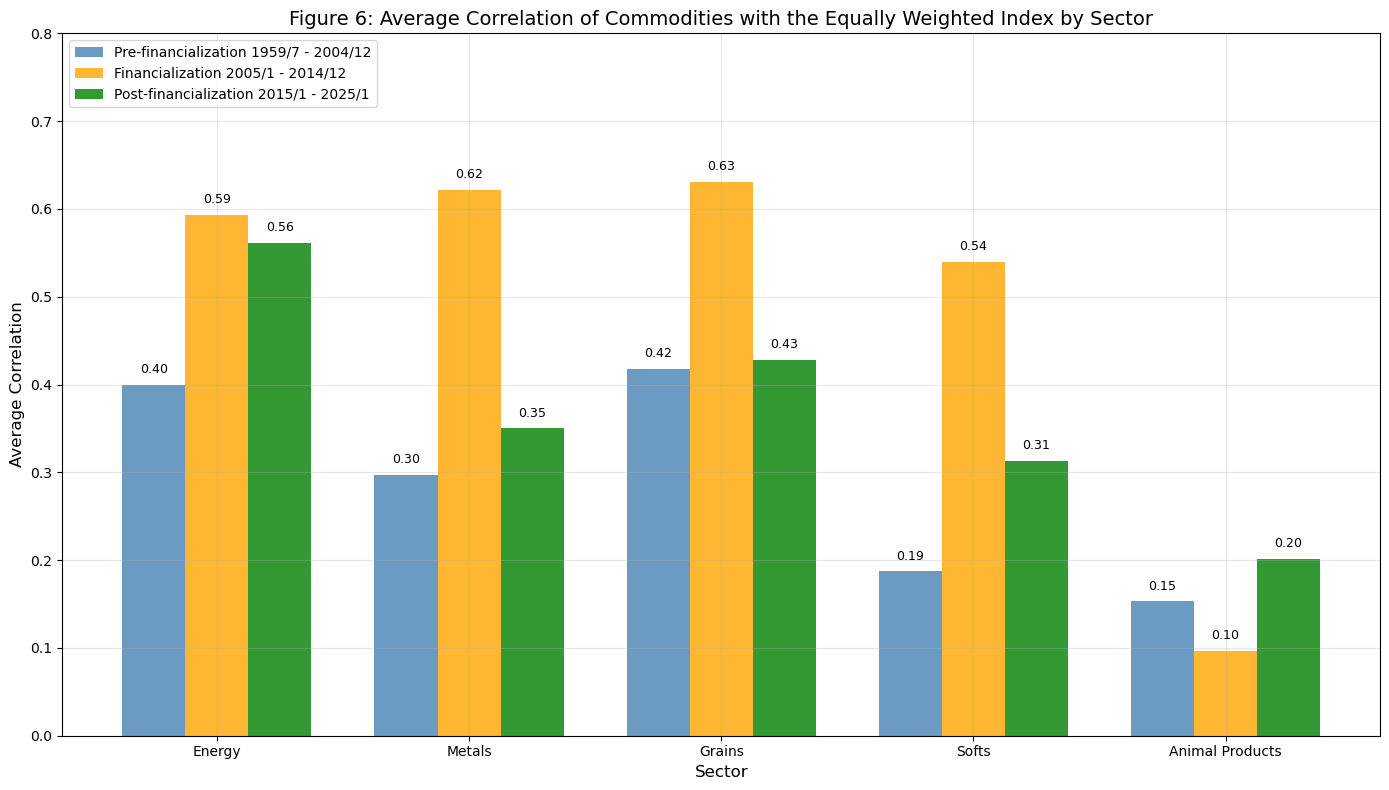


Sector Correlation Results:

Pre-financialization 1959/7 - 2004/12:
  Energy: 0.400
  Metals: 0.297
  Grains: 0.418
  Softs: 0.187
  Animal Products: 0.153

Financialization 2005/1 - 2014/12:
  Energy: 0.594
  Metals: 0.621
  Grains: 0.631
  Softs: 0.540
  Animal Products: 0.096

Post-financialization 2015/1 - 2025/1:
  Energy: 0.561
  Metals: 0.350
  Grains: 0.428
  Softs: 0.313
  Animal Products: 0.201


In [ ]:
plot_correlation_by_sector(collateralized_futures_returns_df, periods)

### Futures, Bonds and Stocks:

#### Inflation-Adjust Performance of Stocks, Bonds and Commoditty futures
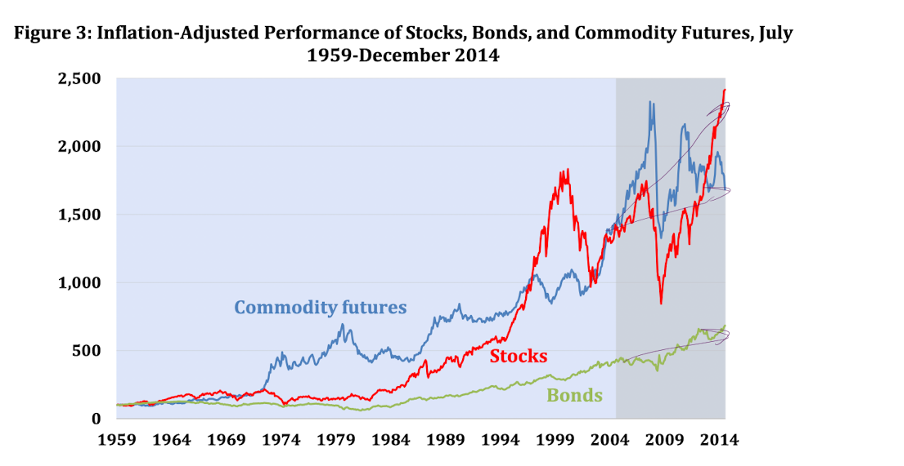

corporate_bond_aligned.head()
sp500_aligned.head()

for period_name, (start_str, end_str) in periods.items():


## 4. 2015 Erb & Harvey- Conquering Misperceptions about Commodity Futures Investing



Definitions:
- Price Return = simplest return. ie how much did the price of a front-month commodity go up or down
- Collateral Return = risk-free return from TBills
- `Excess return = Price Return + Roll Return` --> ie this is generated purely by the futures position itself. It's called "excess" because it's the return in excess of the risk-free rate one would get from just holding cash (the collateral).
- `Roll Return = Excess - Price` --> what profit or loss did we make from the shape of the futures curve when we rolled our position 

However, academically rigorous formula is: `Real Return=(1+Inflation)/(1+Total Return​)−1`


- `Income Return = Roll Return + Collateral Return` --> this is the return investor receives if the spot price of the commodity does not change

**Example**
Input Data:
                       
- December (t-1): Continuation 1 = $1800 ; Continuation 2 = $1805 ; T-Bill Rate  = 1.2%
- Jan (t): Continuation 1: 1820
- Inflation for Jan: 0.50%

Calculating the returns:
- Jan Price Return = `1820 (Cont 1 Jan) / 1800 (Cont 1 Dec) - 1 = +1.11%`
- Collateral Return = `1.2% / 12 = +0.1%`
- Excess Return = `1820 (Cont 1 Jan ) / 1805 (Cont 2 Dec) - 1 = +0.83%`
- Roll Return = `0.83% (Excess) - 1.11% (Price) = -0.28%`
- Total Return = `0.83% (Excess) + 0.1% (Collateral) = 0.93%`
- Real Total Return = `0.93% (Total) - 0.5% (Inflation) = 0.43%`


In [ ]:
total_return_series = (ew_futures_returns*100).rename("Total_Return")
price_return_series = (ew_spot_returns*100).rename("Price_Return")
inflation_series = (monthly_inflation_cpi_df*100).rename("Inflation")


analysis_df = pd.concat([total_return_series, price_return_series, inflation_series], axis=1)
analysis_df = analysis_df.loc[start_date:end_date]



In [ ]:
analysis_df['Income_Return'] = analysis_df['Total_Return'] - analysis_df['Price_Return']
analysis_df.dropna(inplace=True)
analysis_df

,Total_Return,Price_Return,Inflation,Income_Return
Exchange Date,,,,
2015-01-31,-5.340361,-4.924122,-0.470589,-0.416238
2015-02-28,3.058206,4.038808,0.434304,-0.980602
2015-03-31,-5.276827,-4.829049,0.595172,-0.447778
2015-04-30,2.496839,3.376949,0.203287,-0.880110
2015-05-31,-1.737352,-1.022839,0.509723,-0.714512
...,...,...,...,...
2024-08-31,1.893050,0.145706,0.081389,1.747343
2024-09-30,5.878330,4.814776,0.160421,1.063553
2024-10-31,0.779345,-0.243143,0.115128,1.022488


In [ ]:
window = 120 # 10 years * 12 months

analysis_df['Rolling_Total'] = analysis_df['Total_Return'].rolling(window=window).mean() * 12
analysis_df['Rolling_Price'] = analysis_df['Price_Return'].rolling(window=window).mean() * 12
analysis_df['Rolling_Income'] = analysis_df['Income_Return'].rolling(window=window).mean() * 12
analysis_df['Rolling_Inflation'] = analysis_df['Inflation'].rolling(window=window).mean() * 12
analysis_df.tail()

,Total_Return,Price_Return,Inflation,Income_Return,Rolling_Total,Rolling_Price,Rolling_Income,Rolling_Inflation
Exchange Date,,,,,,,,
2024-08-31,1.893050,0.145706,0.081389,1.747343,NaN,NaN,NaN,NaN
2024-09-30,5.878330,4.814776,0.160421,1.063553,NaN,NaN,NaN,NaN
2024-10-31,0.779345,-0.243143,0.115128,1.022488,NaN,NaN,NaN,NaN
2024-11-30,0.799477,0.335629,-0.054172,0.463848,NaN,NaN,NaN,NaN
2024-12-31,0.926514,0.717712,0.035500,0.208801,6.291801,8.143055,-1.851254,2.967749


In [ ]:
# Import the required library for linear regression
from scipy.stats import linregress

# Prepare the final rolling data, dropping any rows with NaNs to ensure clean regression
plotting_df = analysis_df[['Rolling_Total', 'Rolling_Price', 'Rolling_Income', 'Rolling_Inflation']].dropna()

# %% [markdown]
# ### Exhibit 5: Total Return vs. Income Return

# %%
# --- Data Preparation for Plot ---
x_data = plotting_df['Rolling_Income']
y_data = plotting_df['Rolling_Total']

# --- Perform Linear Regression ---
# linregress returns: slope, intercept, r_value, p_value, stderr
slope, intercept, r_value, _, _ = linregress(x_data, y_data)
r_squared = r_value**2

# --- Create the Plot ---
plt.figure(figsize=(10, 8))
ax = sns.regplot(x=x_data, y=y_data,
                 scatter_kws={'alpha': 0.5, 'color': 'royalblue'},
                 line_kws={'color': 'firebrick', 'linewidth': 2})

# --- Set Titles and Labels from Paper Description ---
plt.title('Exhibit 5 Replication: Historically, Perfect Foresight of Commodity Income Returns has been Helpful', fontsize=14)
ax.set_xlabel('Rolling 10-Year EW Index Income Return (in %)')
ax.set_ylabel('Rolling 10-Year EW Index Total Return (in %)')

# --- Add Annotation with Calculated Statistics ---
annotation_text = (
    f"Regression on Your EW Index Data:\n"
    f"Total Return = {intercept:.2f} + {slope:.2f} × Income Return\n"
    f"R² = {r_squared:.2f}"
)
ax.text(0.05, 0.95, annotation_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# %% [markdown]
# ### Exhibit 6: Total Return vs. Price Return

# %%
# --- Data Preparation ---
x_data = plotting_df['Rolling_Price']
y_data = plotting_df['Rolling_Total']

# --- Perform Linear Regression ---
slope, intercept, r_value, _, _ = linregress(x_data, y_data)
r_squared = r_value**2

# --- Create the Plot ---
plt.figure(figsize=(10, 8))
ax = sns.regplot(x=x_data, y=y_data,
                 scatter_kws={'alpha': 0.5, 'color': 'royalblue'},
                 line_kws={'color': 'firebrick', 'linewidth': 2})

# --- Set Titles and Labels ---
plt.title('Exhibit 6 Replication: Historically, Perfect Foresight of Commodity Price Returns has not been Useful', fontsize=14)
ax.set_xlabel('Rolling 10-Year EW Index Price Return (in %)')
ax.set_ylabel('Rolling 10-Year EW Index Total Return (in %)')

# --- Add Annotation ---
annotation_text = (
    f"Regression on Your EW Index Data:\n"
    f"Total Return = {intercept:.2f} + {slope:.2f} × Price Return\n"
    f"R² = {r_squared:.3f}" # Using 3 decimal places to match paper's 0.004
)
ax.text(0.05, 0.95, annotation_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# %% [markdown]
# ### Exhibit 7: Price Return vs. Income Return

# %%
# --- Data Preparation ---
x_data = plotting_df['Rolling_Income']
y_data = plotting_df['Rolling_Price']

# --- Perform Linear Regression ---
slope, intercept, r_value, _, _ = linregress(x_data, y_data)
r_squared = r_value**2

# --- Create the Plot ---
plt.figure(figsize=(10, 8))
ax = sns.regplot(x=x_data, y=y_data,
                 scatter_kws={'alpha': 0.5, 'color': 'royalblue'},
                 line_kws={'color': 'firebrick', 'linewidth': 2})

# --- Set Titles and Labels ---
plt.title('Exhibit 7 Replication: Historically, High Commodity Income Returns Associated with Low Price Returns', fontsize=14)
ax.set_xlabel('Rolling 10-Year EW Index "Income" Return (in %)')
ax.set_ylabel('Rolling 10-Year EW Index Price Return (in %)')

# --- Add Annotation ---
annotation_text = (
    f"Regression on Your EW Index Data:\n"
    f"Price Return = {intercept:.2f} + {slope:.2f} × Income Return\n"
    f"R² = {r_squared:.2f}"
)
ax.text(0.05, 0.95, annotation_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# %% [markdown]
# ### Exhibit 8: The Inflation Hedge Analysis

# %%
plt.figure(figsize=(12, 9))
ax = plt.gca() # Get current axes

# --- 1. Total Return vs. Inflation ---
x_total = plotting_df['Rolling_Inflation']
y_total = plotting_df['Rolling_Total']
slope_total, intercept_total, r_total, _, _ = linregress(x_total, y_total)
r2_total = r_total**2
sns.regplot(x=x_total, y=y_total, ax=ax, color='green', scatter_kws={'alpha':0.4}, label=f'Total Return (R²={r2_total:.2f})')

# --- 2. Income Return vs. Inflation ---
x_income = plotting_df['Rolling_Inflation']
y_income = plotting_df['Rolling_Income']
slope_income, intercept_income, r_income, _, _ = linregress(x_income, y_income)
r2_income = r_income**2
sns.regplot(x=x_income, y=y_income, ax=ax, color='blue', scatter_kws={'alpha':0.4}, label=f'Income Return (R²={r2_income:.2f})')

# --- 3. Price Return vs. Inflation ---
x_price = plotting_df['Rolling_Inflation']
y_price = plotting_df['Rolling_Price']
slope_price, intercept_price, r_price, _, _ = linregress(x_price, y_price)
r2_price = r_price**2
sns.regplot(x=x_price, y=y_price, ax=ax, color='red', scatter_kws={'alpha':0.4}, label=f'Price Return (R²={r2_price:.2f})')

# --- Set Titles and Labels ---
plt.title('Exhibit 8 Replication: Historically, Perfect Foresight of Inflation Has Been A Mixed Bag', fontsize=14)
ax.set_xlabel('Rolling 10-Year US CPI Inflation Rate (in %)')
ax.set_ylabel('Rolling 10-Year Return (in %)')

# --- Add Annotation Block ---
annotation_text = (
    f"Regressions on Your EW Index Data:\n"
    f"Total Return = {intercept_total:.2f} + {slope_total:.2f} × Inflation\n"
    f"Income Return = {intercept_income:.2f} + {slope_income:.2f} × Inflation\n"
    f"Price Return = {intercept_price:.2f} + {slope_price:.2f} × Inflation"
)
print(annotation_text)
ax.text(0.05, 0.95, annotation_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

/Users/savat/miniconda3/envs/com_env/lib/python3.12/site-packages/scipy/stats/_stats_py.py:10730: RuntimeWarning:

invalid value encountered in scalar divide

/Users/savat/miniconda3/envs/com_env/lib/python3.12/site-packages/scipy/stats/_stats_py.py:10744: RuntimeWarning:

invalid value encountered in sqrt

/Users/savat/miniconda3/envs/com_env/lib/python3.12/site-packages/scipy/stats/_stats_py.py:10750: RuntimeWarning:

invalid value encountered in scalar divide



NameError: name 'sns' is not defined

<Figure size 1000x800 with 0 Axes>

# Export the data

In [ ]:
# --- 1. Setup Export Directory ---
export_dir = 'streamlit_data'
os.makedirs(export_dir, exist_ok=True)
print(f"Data will be exported to the '{export_dir}/' directory.")


Data will be exported to the 'streamlit_data/' directory.


In [ ]:
# --- 3. Export Daily Price Histories (Requirement d) ---
# These files contain the raw, daily prices for the selected date range.
# The MultiIndex columns will be preserved in the CSV.
daily_front_month_filepath = os.path.join(export_dir, 'daily_front_month_prices.csv')
filtered_front_month_df.to_csv(daily_front_month_filepath)
print(f"  - Saved daily front-month prices to: {daily_front_month_filepath}")

daily_second_month_filepath = os.path.join(export_dir, 'daily_second_month_prices.csv')
filtered_second_month_df.to_csv(daily_second_month_filepath)
print(f"  - Saved daily second-month prices to: {daily_second_month_filepath}")


  - Saved daily front-month prices to: streamlit_data/daily_front_month_prices.csv
  - Saved daily second-month prices to: streamlit_data/daily_second_month_prices.csv


In [ ]:
# --- 4. Consolidate and Export Monthly Returns (Requirements a, b, c) ---
# This single file will contain all the monthly returns needed to create the
# historical performance plots for all indices (commodities, equities, bonds).

# Combine all final monthly return Series into one DataFrame
all_returns_df = pd.concat([
    ew_spot_returns.rename("Spot_Index_Returns"),
    ew_futures_returns.rename("Futures_Index_Returns"),
    ew_real_spot_returns.rename("Real_Spot_Index_Returns"),
    ew_real_futures_returns.rename("Real_Futures_Index_Returns"),
    sp500_aligned.rename("SP500_Returns"),
    corporate_bond_aligned.rename("Bond_Index_Returns"),
    monthly_inflation_cpi_df.rename("Inflation_Rate")
], axis=1)

# Ensure the index is a standard DatetimeIndex for compatibility
# (No conversion needed if already DatetimeIndex)

# Save the combined returns data
returns_filepath = os.path.join(export_dir, 'monthly_returns_all_indices.csv')
# Restrict to data from 2004-01-01 onwards
all_returns_df = all_returns_df.loc["2004-01-01":"2025-04-01"]
all_returns_df.to_csv(returns_filepath)
print(f"  - Saved all consolidated monthly returns to: {returns_filepath}")

print("\nExport complete.")

  - Saved all consolidated monthly returns to: streamlit_data/monthly_returns_all_indices.csv

Export complete.


# Reproducing Results

Paper 1 - 

Paper 2 - FACTS AND FANTASIES ABOUT COMMODITY FUTURES TEN YEARS LATER

# Understanding the mechanics of the index



## QUESTION 1:
```

I want to more deeply understand the mechanics of how this index works and get an intuition for it.


Let's imagine that instead of the index consisting of many commodities in only consisted of gold, for example.


What is a front month contract and a second month contract, when do they mature and etc... Is it like if I am in september 2003, then the Front Month is due for delivery on next month ? or what? I am confused 

```

Of course. This is an excellent question, as the "roll" mechanism is the absolute key to understanding how a futures index generates returns. Let's break it down using your simplified example of an index consisting only of gold.

### 1. The Basics: What Are We Trading?

First, it's crucial to remember what a futures contract is. It's not a stock. It's a temporary agreement to buy or sell something at a future date for a price agreed upon today.

* **Commodity:** Gold (physical metal).
* **Futures Contract:** A specific contract for a specific delivery month, e.g., "December 2003 Gold." This contract has a price and an expiration date.
* **Expiration/Maturity:** The last day on which a given futures contract can be traded. After this date, the contract must be settled, either by delivering the physical gold or, more commonly, through a final cash payment.

For a single commodity like gold, there isn't just one futures contract. There are many, each for a different delivery month (e.g., August 2003, October 2003, December 2003, February 2004, etc.).

### 2. Front Month vs. Second Month

This is where the terminology comes in. Let's place ourselves on **September 15, 2003**.

* **Front Month (or "Nearby") Contract:** This is the futures contract with the **closest expiration date**. Looking at the available gold contracts, the next one to expire is the **October 2003** contract. This is the Front Month. It's typically the most actively traded and liquid contract.

* **Second Month (or "Next") Contract:** This is the contract that expires **after the Front Month**. In our example, the contract that expires after the October 2003 contract is the **December 2003** contract. This is the Second Month.

So, on September 15, 2003:
* Front Month = **October 2003 Gold**
* Second Month = **December 2003 Gold**

### 3. The "Roll": How the Index Stays Invested

An investor in a futures index wants continuous exposure to the asset class (gold, in this case). They do **not** want to take delivery of 100 troy ounces of gold in October. The goal is to capture the price movements and the risk premium, not to own the physical commodity.

To achieve this, the index must systematically sell the contract it holds just before it expires and buy the next one. This is called **"rolling the position."**

The paper gives us the specific rule they use:
> "On each day, we selected the contract with the nearest expiration date (the shortest contract) for our index, **unless the contract expired in that month, in which case we would roll into the next contract.** In each month, we therefore hold the shortest futures contract that will not expire in that month."

Let's trace this rule through time with our gold example.

**A Step-by-Step Example:**

* **Throughout September 2003:**
    * The "shortest contract that will not expire in *this month* (September)" is the **October 2003 Gold contract**.
    * So, for all of September, the index holds a long position in the October 2003 contract.

* **End of September 2003 (e.g., last business day, Sept. 30):**
    * The calendar is about to flip to October.
    * Our current holding, the October 2003 contract, is now set to expire *in the upcoming month*.
    * According to the rule, we cannot hold it. We must **roll**.
    * **The Action:** The index sells its October 2003 Gold contract and simultaneously buys the **Second Month** contract, which is the **December 2003 Gold contract**.

* **Throughout October 2003:**
    * The index now holds the **December 2003 Gold contract**.
    * This follows the rule, as the December contract is the "shortest contract that will not expire in *this month* (October)."

* **Throughout November 2003:**
    * The index continues to hold the **December 2003 Gold contract**.
    * This still follows the rule, as the December contract does not expire in November.

* **End of November 2003 (e.g., last business day, Nov. 28):**
    * The calendar is about to flip to December.
    * Our current holding, the December 2003 contract, is now set to expire *in the upcoming month*.
    * We must **roll** again.
    * **The Action:** The index sells its December 2003 Gold contract and buys the next one out, which would be the **February 2004 Gold contract**.

This process repeats every month or two, ensuring the index always holds a liquid futures contract but never has to deal with physical delivery.

### Intuition and Tying it Back to the Paper's Findings

This mechanical process is how the index generates its returns. The return in any given month comes from three sources:

1.  **Price Return:** The change in the price of the futures contract you are holding. (e.g., The price of the October 2003 contract went up or down during September).
2.  **Roll Yield:** The gain or loss that comes from selling the expiring contract and buying the next one.
    * If the new contract (Dec '03) is cheaper than the old one (Oct '03), you have a positive roll yield. This situation is called **backwardation**.
    * If the new contract is more expensive, you have a negative roll yield. This is called **contango**.
    * The paper's finding of a significant risk premium suggests that, on average, these markets have historically been in backwardation (or at least that the futures price tends to rise toward the spot price over the life of the contract), providing a positive return to long-only investors.
3.  **Collateral Yield:** The paper is very clear that this is a **"fully collateralized"** index. This means for every dollar of notional exposure to gold futures, a dollar is invested in risk-free T-bills. The interest earned on these T-bills is the collateral yield.

**Total Return of the Index = Price Return + Roll Yield + Collateral Yield**

By creating a hypothetical gold-only index that follows this rolling procedure, you have perfectly captured the mechanics of how the Gorton-Rouwenhorst index works for a single one of its many components. The full index simply does this for all its commodities simultaneously and rebalances them to equal weights each month.



### Your Specific Concern: The Roll and Continuation Contracts

This is the heart of the matter. Let's get to it.

**The Paper's Method:**

> "On each day, we selected the contract with the nearest expiration date (the shortest contract) for our index, **unless the contract expired in that month, in which case we would roll into the next contract.** In each month, we therefore hold the shortest futures contract that will not expire in that month."

This is an **explicit, date-based rule**. To implement it perfectly, for every single month in the sample, you would need to:

1.  Look at the front-month contract (e.g., July Cocoa, `CC N`).
2.  Find its expiration date.
3.  If that date falls within the current month (July), you must discard it and use the *next* contract (e.g., September Cocoa, `CC U`) as your "active" contract for all calculations in that month.

**Your Method (Using Continuation Contracts):**
You are using **Continuation Contracts** (e.g., `CCc1`, `CCc2`) from LSEG. A continuation contract is not a real, tradable asset. It is a **synthetic time series** created by the data provider (LSEG/Refinitiv) by stitching together historical individual contracts (like `CCN4`, `CCU4`, `CCZ4`, etc.).

The provider uses a set of rules to decide when to "roll" from one underlying contract to the next. These rules are typically based on factors like:

  * A fixed number of days before expiration.
  * When trading volume or open interest shifts significantly from the front month to the next.
  * The first day of the delivery month.

**The Discrepancy:**
Your code **implicitly delegates the rolling decision to LSEG**. You are trusting that LSEG's logic for creating `CCc1` and `CCc2` is a close enough proxy for the paper's logic.

**Is this a problem?**

  * **For a precise academic replication:** Yes, it's a deviation. The roll dates chosen by LSEG might differ from the roll dates dictated by the paper's "expires in this month" rule. This can lead to small but meaningful differences in calculated monthly returns, especially when the futures curve is steep (in high contango or backwardation).
  * **For a practical application:** Your approach is extremely common and often the only feasible one without access to a massive historical database of every individual contract and its metadata. The results are likely to be highly correlated and directionally very similar to a "perfect" replication.

**Conclusion:** Your code does not explicitly implement the paper's rolling rule. It uses a reasonable and practical proxy (continuation contracts) that relies on the data provider's own rolling methodology.

-----

### How Can You Account for This?

You can address this discrepancy and build a more robust replica. Given the sample data you provided for the Cocoa contract (`CCc1`), you have the necessary information: `EXPIR_DATE`.

Here is a conceptual framework for how you could implement the paper's exact logic. This requires moving away from continuation contracts and using data for individual, expiring contracts.

**The "Gold Standard" Replication Approach:**

1.  **Data Requirement:** You would need historical daily data for individual contracts, not continuations. For example, for Cocoa, you'd need `CCN5` (July 25), `CCU5` (Sep 25), `CCZ5` (Dec 25), etc., each with their `EXPIR_DATE`.

2.  **New Logic (Monthly Loop):** For each month in your sample period:
    a.  Identify the front-month contract and the second-month contract based on their expiration dates.
    b.  Let's say in June 2025, the front contract is July 2025 (`EXPIR_DATE: 16-Jul-2025`) and the second contract is Sep 2025.
    c.  For your **end-of-month processing for June**, you check the expiration date of the front contract (July 25). It expires in July, not June. So, for June, your "active" contract is the July contract. The "next" contract is the September one.
    d.  Now, for **end-of-month processing for July**, you check the expiration of the same front contract (July 25). It **expires in the current month (July)**.
    e.  According to the paper's rule, you **must not use it**. Your "active" contract for July is now the **September 2025 contract**. The "next" contract would be the December 2025 contract.

This is significantly more complex as it requires careful state management to track which contract was "bought" in the prior month.

**A Practical Path Forward:**

1.  **Acknowledge the Limitation:** The simplest and most honest approach is to proceed with your current method using continuation contracts and explicitly state in your assumptions: *"This analysis uses LSEG's continuous futures contracts (1st and 2nd month) as a proxy for a manually rolled portfolio. The rolling logic is therefore determined by the data provider's methodology, which may differ slightly from the rule specified in Gorton and Rouwenhorst (2004) of rolling in the month of expiration."*
2.  **Attempt a Hybrid Fix:** You could try to "correct" the continuation data. For each month, check the expiration date of the underlying contract that `CCc1` is tracking (data providers sometimes supply this). If that expiration falls in the current month, you could manually substitute the price from `CCc2` for that month's `CCc1` price. This is complex and may introduce its own errors but gets you closer to the paper's methodology.
3.  **The Full Replication (if possible):** If you can get the data for individual contracts, you can build the more complex logic described in the "Gold Standard" section. This would be a more faithful replication of the paper.

Given your progress, **Option 1** is the most pragmatic. Your current code is a very strong and well-reasoned replication. The final results may differ from the paper due to data period and the roll-timing nuance, but your *methodology* is sound and defensible as a practical approximation of the paper's ideal.

# Acknowledgement of Assumptions and Limitations:


### **Methodological Considerations and Limitations of the Study**

This study aims to replicate and extend the foundational analysis of Gorton and Rouwenhorst (G&R, 2004) on the performance of commodity futures as an asset class. While the core principles of the original paper—namely the construction of an equally-weighted, fully-collateralized commodity futures index—have been rigorously followed, several practical limitations related to data availability and historical scope necessitate deviations from the original methodology. These differences are crucial for interpreting the results of this analysis and for comparing them to the findings of G&R.

The primary limitations and methodological choices are detailed below:

#### 1. Data Source, Sample Period, and Historical Context

The most significant divergence from the original study is the sample period and data source. G&R constructed their index using data from the Commodity Research Bureau (CRB) and the London Metals Exchange (LME) for the period of July 1959 to March 2004. This analysis utilizes a more contemporary dataset sourced from LSEG Workspace (Refinitiv) covering the period from January 1991 to the present.

This discrepancy has two major implications:
* **Different Economic Regimes:** The G&R study encompasses distinct economic eras, most notably the high-inflation environment of the 1970s, which was highly favorable for commodity returns. The post-1991 period analyzed here is characterized by different macroeconomic conditions, including the dot-com bubble, the 2008 Global Financial Crisis, an extended period of low inflation and quantitative easing, and the recent inflationary pressures post-COVID-19. Consequently, the performance characteristics of all asset classes, including commodities, are expected to differ.
* **Commodity Universe:** The set of available and liquid commodity futures has evolved. While this study includes a broad range of commodities, the universe does not perfectly match the 36 contracts available to G&R towards the end of their sample. The inclusion or exclusion of certain commodities will naturally affect the overall performance and volatility of the resulting index.

#### 2. Futures Rolling Convention: The Use of Continuation Contracts

A critical, nuanced difference lies in the implementation of the futures rolling strategy. G&R specified a clear, date-based rule for their index:
> *"In each month, we therefore hold the shortest futures contract that will not expire in that month."*

This implies a manual check of each front-month contract's expiration date. If a contract was set to expire within the current calendar month, they would "roll" by using the second-month contract for that month's return calculation.

This study, due to practical data constraints, relies on **synthetic continuation contracts** provided by LSEG (e.g., `CCc1` for the front month of cocoa, `CCc2` for the second month). These are not directly tradable instruments but are time series constructed by the data provider, stitching together individual expiring contracts to create a continuous price history.

The key limitation is that **the rolling logic is delegated to the data provider (LSEG)**. The provider's decision to roll from one underlying contract to the next is based on a proprietary methodology, which typically considers factors such as trading volume, open interest, or a fixed number of days prior to expiration. This methodology is likely different from the simple, month-based rule used by G&R.

The potential impact of this is non-trivial. A difference of even a few days in the timing of a roll can alter the calculated monthly return, particularly when the futures curve is steep (in high contango or backwardation). Therefore, while our approach correctly simulates the *concept* of a rolling strategy, the precise returns may differ from a perfect replication of the G&R rule.

#### 3. Handling of Data Gaps

G&R noted specific months where data for certain commodities were unavailable. In these instances, they set the price (excess) return to zero for that commodity, meaning its allocation effectively earned the T-bill rate for that month.

This analysis employs a different strategy for handling missing data. Short gaps (1-2 months) in the monthly price series are filled using linear interpolation to maintain the continuity of the return series. While this is a standard data-cleaning technique, it represents a different assumption about the behavior of prices during a data outage compared to the G&R approach.

#### 4. Proxy for the Risk-Free Rate

The G&R study used the total return of 30-day Treasury Bills from Ibbotson as the collateral return. This analysis uses the 3-Month Treasury Bill Secondary Market Rate as the base risk-free rate, which is then mathematically converted to a 1-month equivalent return. While this conversion is standard, the resulting rate is an approximation and may not perfectly mirror the actual realized return from holding a portfolio of rolling 1-month T-bills over the same period.

In conclusion, while this study provides a robust and valuable analysis of commodity futures performance in the modern era based on the principles of Gorton and Rouwenhorst, it should be viewed as a contemporary application of their methodology rather than a direct historical replication. The findings are shaped by the specific data, time period, and methodological choices detailed above, most notably the reliance on provider-generated continuation contracts for the rolling of futures positions.